# Análisis de Ventas en Retail

**Contenido**

1. Introducción
2. Preparación
3. Preprocesamiento
4. Insights
5. Resultados
6. Conclusiones

## 1. Introducción

Con el objetivo de tomar decisiones para gestionar la operación y aplicar estrategias respecto a la fidelización de clientes, una importante organización de retail ha solicitado un estudio analítico respecto a la tendencia de las ventas de la compañia.

Para llevar a cabo este estudio se analizarán las ventas de los últimos meses, en donde se buscará responder lo siguiente: 

1. ¿Existen productos favoritos que compran los clientes?
2. ¿Existe algún horario específico en el que los clientes compran?
3. ¿En qué horario sugeriría refuerzo en los servidores de la tienda para evitar un colapso?
4. ¿Qué frecuencia de compra tiene un cliente de alta frecuencia?
5. ¿Cuánto debería gastar un cliente para considerarlo sobre la media?
6. ¿Cómo se distribuyen las antigüedades de los clientes?
7. Si se clasifican en 3 grupos a los clientes, en base a su frecuencia de compra ¿Qué 
diferencias existen entre cada clúster?

La información obtenida será posteriormente presentada al directorio. 

## 2. Preparación

### 2.1. Librerias

In [147]:
!pip install sweetviz Pillow ptitprince



[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [148]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import sweetviz as sv
import ptitprince as pt
import re 
import matplotlib as mpl
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from datetime import datetime,timedelta, date

In [149]:
%matplotlib inline 
warnings.filterwarnings('ignore')

### 2.2. Base de datos

In [150]:
%%time
# Importar base de datos con las ventas de los ultimos 7 meses a analizar
df_original = pd.read_excel('M7_EV_DS_Dataset.xlsx',converters={'CustomerID':str})

Wall time: 4min 9s


In [151]:
# # Google Colab
# # Estableciendo la conexión con Drive
# from google.colab import drive
# drive.mount('/content/drive/')

In [152]:
# # Google Colab
# # Importar base de datos con las ventas de los ultimos 7 meses a analizar
# path = '/content/drive/MyDrive/Colab Notebooks/Diplomado DS USACH/Modulo 7/HW/M7_EV_DS_Dataset.xlsx'
# df_original = pd.read_excel(path,converters={'CustomerID':str})

In [153]:
df_original.head(1)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom

## 3. Preprocesamiento

### 3.1. EDA

En este punto se realizará un análisis de exploración de la data inicial. Nos limitaremos a evaluar la calidad de los features, ya que luego en el punto 3.2. es cuando aplicaremos las transformaciones que notemos que sean necesarias, tales como limpieza de nulls, eliminación de outliers, etc.

In [154]:
# Copia de respaldo para no alterar la base original 
df1 = df_original.copy()

In [155]:
# Revisando los primeros 5 registros
df1.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom

In [156]:
# Revisando los últimos 5 registros
df1.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID Country  
541904 2011-12-09 12:50:00       0.85      12680  France  
541905 2011-12-09 12:50:00       2.10      12680  France  
541906 2011-12-09 12:50:00       4.15      12680  France  
541907 2011-12-09 12:50:00       4.15      12680  France  
541908 2011-12-09 12:50:00       4.95      12680  France

In [157]:
# Dimensión de la base de datos importada
df1.shape

(541909, 8)

In [158]:
# Obtener información de las columnas, tales como sus datos nulos y su dtype
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [159]:
# Revisar duplicados
df1.duplicated().sum()

5268

In [160]:
# Cantidad valores únicos
df1.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [161]:
# Proporción valores únicos
df1.nunique() / df1.shape[0]

InvoiceNo      0.047794
StockCode      0.007510
Description    0.007793
Quantity       0.001332
InvoiceDate    0.042922
UnitPrice      0.003008
CustomerID     0.008068
Country        0.000070
dtype: float64

In [162]:
# Cantidad de datos nulos 
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [163]:
# Proporcióm de datos nulos
df1.isnull().sum()/df1.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

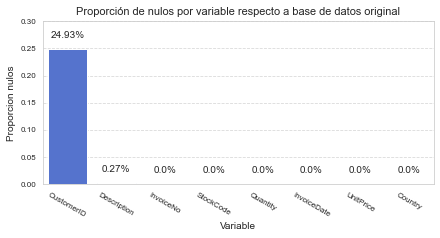

In [164]:
# Plot nulls
df = pd.DataFrame(df1.isnull().sum()/df1.shape[0], columns=['Proporcion nulos'])\
    .reset_index().rename(columns={'index':'Variable'})\
    .sort_values(by='Proporcion nulos', ascending=False)

plt.figure(figsize = (7,3))
ax = sns.barplot(data=df, x='Variable', y='Proporcion nulos', color='royalblue', errwidth=0)
plt.title('Proporción de nulos por variable respecto a base de datos original', fontsize=11)
plt.xlabel('Variable')
plt.xticks(rotation=330)
plt.grid(color='gray', linestyle='--', linewidth=0.8, axis='y', alpha=0.3)
sns.set_style("whitegrid")
plt.yticks(np.arange(0,0.31,0.05))

for i,v in (enumerate(df['Proporcion nulos'])):
  ax.text(i
          ,v+0.02
          ,str(round((v*100),2))+'%'
          ,fontsize=10
          ,ha='center')

plt.show()

In [165]:
df = pd.DataFrame(df1.isnull().sum()/df1.shape[0], columns=['Porc_Nulls'])\
    .reset_index().rename(columns={'index':'Variable'})\
    .sort_values(by='Porc_Nulls', ascending=False)

df

Variable  Porc_Nulls
6   CustomerID    0.249267
2  Description    0.002683
0    InvoiceNo    0.000000
1    StockCode    0.000000
3     Quantity    0.000000
4  InvoiceDate    0.000000
5    UnitPrice    0.000000
7      Country    0.000000

Hasta ahora podemos notar que tenemos 8 columnas, las cuales se pueden traducir/definir como: 

| Campo           | Descripción    |
|-------------------|-------------|
| InvoiceNo         | Número de factura    |
| StockCode         | Código de stock       |
| Description       | Descripción del producto|
| Quantity          | Cantidad  |
| InvoiceDate       | Fecha de factura  |
| UnitPrice         | Precio unitario  |
| CustomerID        | ID del consumidor  |
| Country           | País  |

De todas estas, vemos que quizas tengamos que transformar algunos data types (como el InvoiceDate dejarlo en Date en lugar de Datetime), tratar los valores duplicados y también tratar los nulos, especialmente para la variable de CustomerID, dado que su información contiene un 25% de nulls.

#### 3.1.1. Variables numéricas

In [166]:
# Revisando cierta estadística descriptiva de las variables numéricas
df1.describe()

Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

De partida vemos que ando no anda bien. Existen cantidades minimas negativas tanto para *Quantity* como para *UnitPrice*, lo que nos hace pensar que esta información no aportará valor. 

Nos conformaremos con analizar la información, ya que en el punto 3.2. se aplicarán las transformaciones correspondientes

In [167]:
def box_plot_eda(df,dx,dy=None, pal='Blues', color='royalblue', size=(8, 4), title='Distribución BoxPlot', xticks=None):
  '''
  Función que pemite graficar un diagrama boxplot, en conjunto con su densidad. 
  Input 
      -df: Data frame
      -dx: Variable a procesar en el eje x
      -dy: Variable a procesar en el eje y
      -pal: Paleta de colores
      -color: Color en especifico
      -size: Figsize de la figura
      -title: Titulo del gráfico
      -xticks: Separacion en eje x
  Output
      - Gráfico con el boxplot + densidad 
  '''
  f, ax = plt.subplots(figsize=size)

  ax = pt.half_violinplot( x = dx, y = dy, data = df, width = .6, color=color, scale = "area", inner = None)
  ax = sns.stripplot( x = dx, y = dy, data = df, jitter=True, palette = pal, edgecolor = "white", size = 0.3 , zorder = 0)
  #ax = sns.boxplot(x=dx ,y = dy, data = df, width = .15, color = "black", zorder = 10, showcaps = True, boxprops = {'facecolor':'none', "zorder":10}, showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},saturation = 1)
  ax = sns.boxplot(x=dx, y=dy,data = df, width = .15, color = "black", zorder = 10, showcaps = True, fliersize=3,
                 boxprops = {'facecolor':'none', "zorder":10}, showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},saturation = 1)

  plt.title(title, fontsize=11) #, fontweight='bold'
  #plt.xlabel('Quantity')
  plt.xticks(ticks=xticks, rotation=0)
  plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='x', alpha=0.3)
  sns.set_style("whitegrid")

  plt.show()

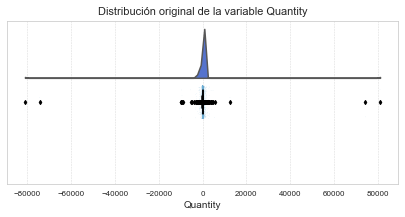

In [168]:
# Quantity Original
box_plot_eda(df1, dx='Quantity', title='Distribución original de la variable Quantity', size=(7,3))

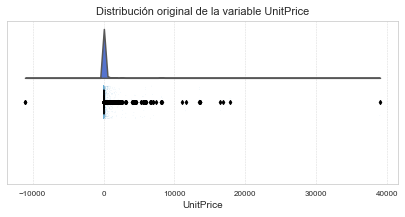

In [169]:
# UnitPrice Original
box_plot_eda(df1, dx='UnitPrice', title='Distribución original de la variable UnitPrice', size=(7,3))

Tal como se puede apreciar, ambas variables numéricas vistas antes se ven seriamente afectada por los outlieres y valores atipicos (como los negativos). Para un correcto análisis estos casos serán tratados en el punto 3.2 Transformaciones

#### 3.1.2. Variables categóricas

In [170]:
# Revisando cierta estadística descriptiva de las variables categóricas (object)
l1 = []
l2 = []
l3 = []
l4 = []

df_cat = df1.copy()
# Adaptando ciertas variables al formato más adecuado
df_cat['InvoiceNo'] = df_cat['InvoiceNo'].apply(lambda x: np.nan if str(x)=='nan' else str(x).replace('.0',''))
df_cat['StockCode'] = df_cat['StockCode'].apply(lambda x: np.nan if str(x)=='nan' else str(x).replace('.0',''))
df_cat['CustomerID'] = df_cat['CustomerID'].apply(lambda x: np.nan if str(x)=='nan' else str(x).replace('.0',''))

for cat_variable in df_cat.select_dtypes(include=['object']).columns:
    l1.append(cat_variable)
    l2.append(df_cat[cat_variable].mode()[0])
    l3.append(df_cat[df_cat[cat_variable] ==df_cat[cat_variable].mode()[0]].shape[0])
    l4.append((df_cat[df_cat[cat_variable] ==df_cat[cat_variable].mode()[0]].shape[0])/(df_cat[cat_variable].shape[0]))
    
d = {'Variable': l1, 'Moda': l2, 'Frecuencia': l3, 'Proporcion': l4}
pd.DataFrame(d)

Variable                                Moda  Frecuencia  Proporcion
0    InvoiceNo                              573585        1114    0.002056
1    StockCode                              85123A        2313    0.004268
2  Description  WHITE HANGING HEART T-LIGHT HOLDER        2369    0.004372
3   CustomerID                               17841        7983    0.014731
4      Country                      United Kingdom      495478    0.914320

In [171]:
def barplot_topN(df,dy,dx=None, pal='Blues', color='royalblue', size=(8, 4), title='Distribución BarPlot', xticks=None, yticks=None, top_n=10, grouped=False, df_grouped=None, horizontal=True, xlabel=None ,ylabel=None):
  '''
  Función que pemite graficar un diagrama barplot para distintas variables categoricas.  
  Input 
      -df: Data frame
      -dx: Variable a procesar en el eje x
      -dy: Variable a procesar en el eje y
      -pal: Paleta de colores
      -color: Color en especifico
      -size: Figsize de la figura
      -title: Titulo del gráfico
      -xticks: Separacion en eje x
      -yticks: Separacion en eje y
      -top_n: Cantidad de N datos más frecuentes a visualizar
      -grouped: Bool para indicar si Dataframe ya está agrupado
      -df_grouped: Dataframe agrupado
      -horizontal: Bool si es horizontal o no (True by default)
      -xlabel: Etiqueta eje x
      -ylabel: Etiqueta eje y
  Output
      -Gráfico con el barplot del top N por frecuencia (descendente)
  '''
  if grouped:
    df_barplot = df_grouped.copy()
  else:
    df_barplot = df[dy].value_counts().rename_axis(dy).reset_index(name='Cantidad').sort_values('Cantidad', ascending=False).reset_index().drop('index',axis=1)
  
  plt.figure(figsize = size)
  if horizontal:
    figure = sns.barplot(data=df_barplot[:top_n], x='Cantidad', y=dy, orient='h', color=color)
    if xlabel== None:
      plt.xlabel('Cantidad')
    else:
       plt.xlabel(xlabel)
    if ylabel== None:
      plt.ylabel(dy)
    else:
       plt.ylabel(ylabel)
    plt.xticks(ticks=xticks ,rotation=0)
  
  else:
    figure = sns.barplot(data=df_barplot[:top_n], x=dx, y='Cantidad', orient='v', color=color)
    if ylabel== None:
      plt.ylabel('Cantidad')
    else:
       plt.ylabel(ylabel)
    if xlabel== None:
      plt.xlabel(dy)
    else:
      plt.xlabel(xlabel)
    plt.yticks(ticks=yticks ,rotation=0)

  plt.title(title, fontsize=10)
  plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='both', alpha=0.3)
  sns.set_style("whitegrid")
  plt.show()

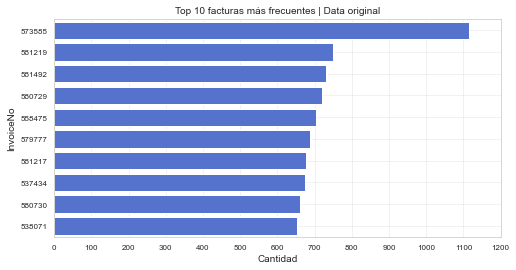

In [172]:
# Frecuencia InvoiceNo totales - Esto es analizando toda la base de datos, por lo que se interpreta que un cliente compró más cosas en esa misma factura
barplot_topN(df_cat, dy='InvoiceNo', title='Top 10 facturas más frecuentes | Data original', xticks=range(0,1201,100))

In [173]:
# Revisando los primeros 3 casos 
## Vemos que el dataset contiene detalle de las facturas, por lo que estas aparecerán tantas veces como productos se vendan
## Si posteriormente queremos analizar las ventas, deberemos agrupar estas facturas
df_cat[df_cat['InvoiceNo']=='581492'].head(3)  #573585 581219 581492

InvoiceNo StockCode                        Description  Quantity  \
540451    581492     23369  SET 36 COLOUR PENCILS LOVE LONDON         2   
540452    581492     23370     SET 36 COLOURING PENCILS DOILY         2   
540453    581492     23371    SET 36 COLOUR PENCILS SPACEBOY          3   

               InvoiceDate  UnitPrice CustomerID         Country  
540451 2011-12-09 10:03:00       2.46        NaN  United Kingdom  
540452 2011-12-09 10:03:00       2.46        NaN  United Kingdom  
540453 2011-12-09 10:03:00       2.46        NaN  United Kingdom

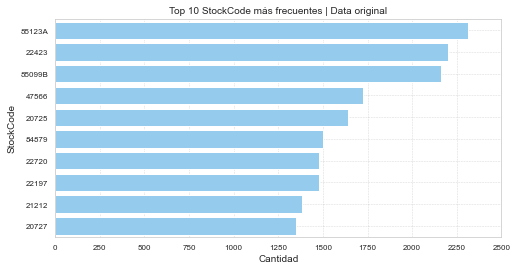

In [174]:
# Frecuencia StockCode totales - Esto es analizando toda la base de datos, sin previo preprocesamiento
barplot_topN(df_cat, dy='StockCode', title='Top 10 StockCode más frecuentes | Data original',xticks=range(0,2501,250), color='lightskyblue')

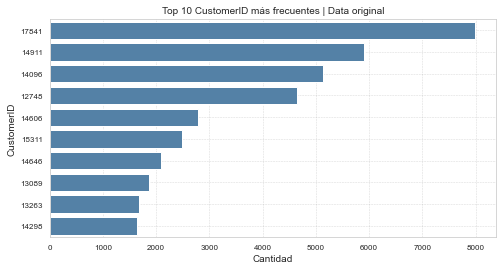

In [175]:
# Frecuencia CustomerID totales - Esto es analizando toda la base de datos, sin previo preprocesamiento
barplot_topN(df_cat, dy='CustomerID', title='Top 10 CustomerID más frecuentes | Data original', color='steelblue')

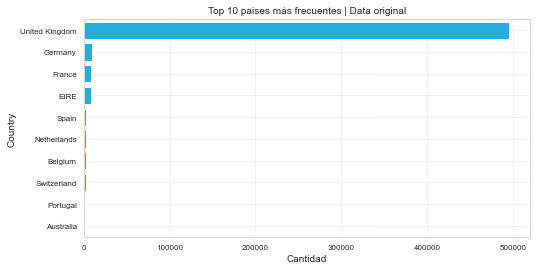

In [176]:
# Frecuencia Country totales - Esto es analizando toda la base de datos, sin previo preprocesamiento
barplot_topN(df_cat, dy='Country', title='Top 10 paises más frecuentes | Data original', color='deepskyblue')

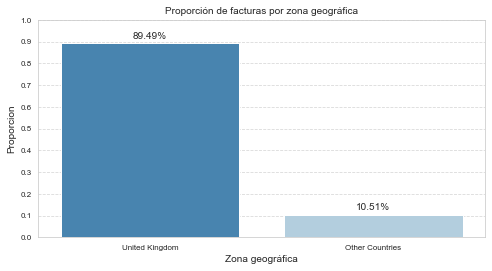

In [177]:
# Frecuencia Country porcentual
df_grouped = df_cat.copy()
df_grouped.drop_duplicates(inplace=True)
df_grouped.dropna(subset=['CustomerID'], axis=0, inplace=True) # Elimniar Customers nan
df_grouped.drop_duplicates(keep='last',inplace=True)
df_grouped = df_grouped.reset_index(drop=True)
df_grouped = pd.DataFrame(df_grouped.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)).reset_index().rename(columns={'InvoiceNo':'Cantidad'})

df_eda_country = df_grouped.copy()
df_eda_country['Proporcion'] = df_eda_country['Cantidad']/df_eda_country['Cantidad'].sum()
df_eda_country['Segmentacion_por_Country'] = df_eda_country['Country'].apply(lambda x: x if x=='United Kingdom' else 'Other Countries')


# Revisando la proporción de forma más general
df_grouped2 = df_eda_country.groupby('Segmentacion_por_Country')['Proporcion'].sum().reset_index()

plt.figure(figsize = (8,4))
ax = sns.barplot(data=df_grouped2.sort_values('Proporcion',ascending=False), x='Segmentacion_por_Country', y='Proporcion', palette='Blues_r', errwidth=0)
plt.title('Proporción de facturas por zona geográfica', fontsize=10)
plt.xlabel('Zona geográfica')
plt.grid(color='gray', linestyle='--', linewidth=0.8, axis='y', alpha=0.3)
sns.set_style("whitegrid")
plt.yticks(np.arange(0,1.1,0.1))

for i,v in (enumerate(df_grouped2['Proporcion'][::-1])):
  ax.text(i
          ,v+0.02
          ,str(round((v*100),2))+'%'
          ,fontsize=10
          ,ha='center')

plt.show()

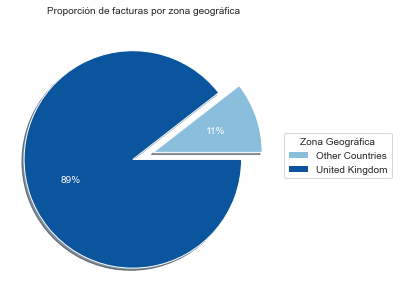

In [178]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))
df_grouped3 = df_eda_country.groupby('Segmentacion_por_Country')['Cantidad'].sum().reset_index()
df_grouped3 = df_grouped3.rename(columns={'Segmentacion_por_Country':'Zona Geográfica'})

zonas = [i for i in df_grouped3['Zona Geográfica']]
wedges, texts, autotexts = ax.pie(df_grouped3['Cantidad'], labels = df_grouped3['Zona Geográfica'], colors = [sns.color_palette('Blues')[2],sns.color_palette('Blues')[5]]
                                    , autopct='%.0f%%', labeldistance=None, explode=[0.1,0.1], shadow=True,textprops=dict(color="w"))

plt.setp(autotexts, size=10)
ax.set_title("Proporción de facturas por zona geográfica", fontdict={'fontsize':10})
ax.legend(wedges, zonas,
          title="Zona Geográfica",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

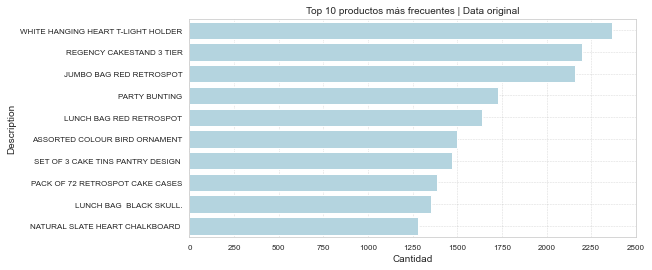

In [179]:
# Frecuencia productos totales - Esto es analizando toda la base de datos, sin previo preprocesamiento
barplot_topN(df_cat, dy='Description', title='Top 10 productos más frecuentes | Data original', color='lightblue', xticks=range(0,2501,250))

#### 3.1.3. Variables datetime

In [180]:
# Revisando la variable "InvoiceDate" relacionada con la temporalidad de los registros
var = 'InvoiceDate'

d = {'Variable':var, 'MinDate':[df1[var].min()], 'MaxDate':[df1[var].max()], 'Moda': [df1[var].mode()[0]] , 'Frecuecia':[df1[df1[cat_variable] ==df1[cat_variable].mode()[0]].shape[0]]}
pd.DataFrame(d)

Variable             MinDate             MaxDate                Moda  \
0  InvoiceDate 2010-12-01 08:26:00 2011-12-09 12:50:00 2011-10-31 14:41:00   

   Frecuecia  
0     495478

In [181]:
def lineplot_timeline(df,dx,dy, pal='Blues', color='royalblue', size=[8, 4], title='Distribución LinePlot', xlabel=None, ylabel=None,xticks=None, yticks=None, rot= 45):
  '''
  Función que pemite graficar un diagrama linepot para distintas variables relacionadas con un cierto periodo de tiempo.  
  Input 
      -df: Data frame
      -dx: Variable a procesar en el eje x
      -dy: Variable a procesar en el eje y
      -pal: Paleta de colores
      -color: Color en especifico
      -size: Figsize de la figura
      -title: Titulo del gráfico
      -xlabel: Label para eje x
      -ylabel: Label para eje y
      -xticks: Separacion en eje x
      -yticks: Separacion en eje y
      -rot: Rotación xticks
  Output
      -Gráfico con el barplot del top N por frecuencia (descendente)
  '''
  plt.figure(figsize = size)
  plt.plot(df[dx], df[dy], color = 'royalblue', marker='o')
  if xlabel != None:
    plt.xlabel(xlabel)
  if ylabel != None:
    plt.ylabel(ylabel)
  if title != None:
    plt.title(title, fontsize=10)
  plt.xticks(xticks, rotation=rot)
  plt.yticks(yticks)
  plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='both', alpha=0.3)
  sns.set_style("whitegrid")
  plt.show()

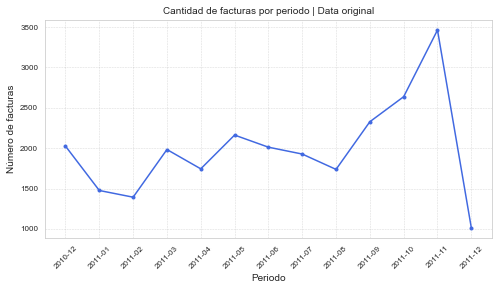

In [182]:
df_eda_date = df1.copy()
df_eda_date['Periodo'] = df_eda_date['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
grouped = pd.DataFrame(df_eda_date.groupby('Periodo')['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad Facturas'})

lineplot_timeline(df=grouped,dx='Periodo',dy='Cantidad Facturas', pal='Blues', color='royalblue', size=[8, 4], title='Cantidad de facturas por periodo | Data original'
                  , xlabel='Periodo', ylabel='Número de facturas')

#### 3.1.4. AutoEDA

In [183]:
# AutoEDA - Corresponde a un análisis básico automático con histogramas por defecto, de acuerdo a como llega la data original
## El resultado es exportado en un html que estará en el mismo workspace que este notebook
## La librería utilizada es sweetviz

df_autoeda = df_cat.copy()
# df_autoeda['InvoiceNo'] = df_autoeda['InvoiceNo'].astype(str)
# df_autoeda['StockCode'] = df_autoeda['StockCode'].astype(str)
df_autoeda['Description'] = df_autoeda['Description'].astype(str)


reporte_autoeda = sv.analyze(df_autoeda)  
reporte_autoeda.show_html() 

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 3.2. Transformaciones

En el punto 3.1. revisamos las caracteristicas de los features, pero sin aplicar ninguna transformación radical sobre la base. 

En este apartado se comenzará a depurar las bases con el objetivo de obtener insights significativos

#### 3.2.1. Corrigiendo dtypes

In [184]:
df2 = df1.copy()

# Tratamineto de variables categóricas que tienen formato ".0" al final de algunos registros
df2['InvoiceNo'] = df2['InvoiceNo'].apply(lambda x: np.nan if str(x)=='nan' else str(x).replace('.0',''))
df2['StockCode'] = df2['StockCode'].apply(lambda x: np.nan if str(x)=='nan' else str(x).replace('.0',''))
df2['CustomerID'] = df2['CustomerID'].apply(lambda x: np.nan if str(x)=='nan' else str(x).replace('.0',''))

df2.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [185]:
df2.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom

#### 3.2.2. Eliminación duplicados

In [186]:
df3 = df2.copy()
df3.drop_duplicates(keep='first', inplace=True)

print(f'Shape inicial: {df2.shape}')
print(f'Shape final: {df3.shape}')

print(f'\nSe eliminan {df2.shape[0]-df3.shape[0]} registros duplicados')

Shape inicial: (541909, 8)
Shape final: (536641, 8)

Se eliminan 5268 registros duplicados


#### 3.2.3. Eliminación información no relacionada a ventas

Como mencionamos antes, existen Quantity <= 0 y UnitPrice <= 0, por lo que tenemos que corregir estas observaciones, quedandonos solo con las ventas puras, es decir con Quantity > 0 y UnitPrice > 0

In [187]:
df4 = df3.copy()
print(f"Cantidad menor o igual a 0 : {df4[df4['Quantity']<=0].shape[0]}")
print(f"Precio unitario menor o igual a 0 : {df4[df4['UnitPrice']<=0].shape[0]}")


df4 = df4[(df4['Quantity']>0) & (df4['UnitPrice']>0)].reset_index(drop=True)
print(f'\nShape inicial: {df3.shape}')
print(f'Shape final: {df4.shape}')

print(f'\nSe eliminan {df3.shape[0]-df4.shape[0]} registros no relacionados a ventas directas')

Cantidad menor o igual a 0 : 10587
Precio unitario menor o igual a 0 : 2512

Shape inicial: (536641, 8)
Shape final: (524878, 8)

Se eliminan 11763 registros no relacionados a ventas directas


In [188]:
df4.describe()

Quantity      UnitPrice
count  524878.000000  524878.000000
mean       10.616600       3.922573
std       156.280031      36.093028
min         1.000000       0.001000
25%         1.000000       1.250000
50%         4.000000       2.080000
75%        11.000000       4.130000
max     80995.000000   13541.330000

#### 3.2.4. Tratamiento de valores nulos

Recordando del EDA de antes, solo tenemos dos features con valores nulls

* Description: 1.454 casos (2,7%)
* CustomerID: 135.080 casos (25%)

Para no ensuciar los análisis posteriores, se procederán a eliminar dichos datos de la base de datos. 

La justificación de esta depuración se basa en 2 razones:

* Para la variable de *Descripcion* al ser un 2.7% de nulls no vale la pena imputar, ya que no afectará el resultado final
* Para la variable *CustomerID* tenemos una cantidad considerable de 1/4 de la data como nulls. Debido a que los análisis posteriores se basaran mayormente en determinar características de estos consumidores, no se correrá el riesgo de interpretar por medio de la imputación, y simplemente se eliminarán estos registros.

In [189]:
df5 = df4.copy()

df5 = df5.dropna(subset=['Description','CustomerID'], axis=0)
print(f'\nShape inicial: {df4.shape}')
print(f'Shape final: {df5.shape}')

print(f'\nSe eliminan {df4.shape[0]-df5.shape[0]} registros por contener valores nulos')


Shape inicial: (524878, 8)
Shape final: (392692, 8)

Se eliminan 132186 registros por contener valores nulos


In [190]:
df5.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### 3.2.5. Tratamiento de valores outliers

Como vimos en el punto *3.1.1. Variables numéricas*, tenemos outliers que condicionan los análisis a realizar. 

Si bien ya eliminamos los negativos tanto para la variable *Quantity* como *UnitPrice*, nos siguen quedando los valores más altos.

Lo que se busca acá es filtrar por valores bajo cierto umbral en ambos casos

In [191]:
# Revisando los quantiles
df6 = df5.copy()
l_quantiles = [0, .1, .5, .9, 0.95, .99, .999, 1]

df_quantile1 = df6.quantile(l_quantiles).reset_index().rename(columns={'index':'quantile'})

n_Quantity = []
n_UnitPrice = []

for q in l_quantiles:
  n_Quantity.append(df6[df6['Quantity']<=df6['Quantity'].quantile(q)].shape[0])
  n_UnitPrice.append(df6[df6['UnitPrice']<=df6['UnitPrice'].quantile(q)].shape[0])

d = {
    'quantile' : l_quantiles,
    'n_Quantity': n_Quantity,
    'n_UnitPrice': n_UnitPrice
}

df_freq_quantiles = pd.DataFrame(d)
df_quantile1['quantile'] = df_quantile1['quantile'].astype(str)
df_freq_quantiles['quantile'] = df_freq_quantiles['quantile'].astype(str)

df_quantile2 = df_quantile1.merge(df_freq_quantiles, how='inner', left_on='quantile', right_on='quantile')
df_quantile2

quantile  Quantity  UnitPrice  n_Quantity  n_UnitPrice
0      0.0       1.0      0.001       69592            4
1      0.1       1.0      0.550       69592        46377
2      0.5       6.0      1.950      231498       207813
3      0.9      24.0      6.350      362017       353485
4     0.95      36.0      8.500      373087       375611
5     0.99     120.0     14.950      388804       388969
6    0.999     504.0     49.950      392301       392316
7      1.0   80995.0   8142.750      392692       392692

In [192]:
# En base a lo anterior se decide que trabajaremos con todos los datos <= quantile 0.99. En otras palabras, nos quedaremos con el 99% de la data y eliminaremos ese 1% de outliers, esto para ambas columnas
df6 = df5.copy()

Quantity_q99 = df6['Quantity'].quantile(0.99)
UnitPrice_q99 = df6['UnitPrice'].quantile(0.99)

print(f'Quantil 0.99 para variable Quantity: {Quantity_q99}')
print(f'Quantil 0.99 para variable UnitPrice: {UnitPrice_q99}\n')

print(f"1 % outliers en variable Quantity : {df6[df6['Quantity'] > Quantity_q99].shape[0]}")
print(f"1 % outliers en variable UnitPrice : {df6[df6['UnitPrice'] > UnitPrice_q99].shape[0]}")

df6 = df6[(df6['Quantity'] <= Quantity_q99) & (df6['UnitPrice'] <= UnitPrice_q99)]

print(f'\nShape inicial: {df5.shape}')
print(f'Shape final: {df6.shape}')

print(f'\nSe eliminan {df5.shape[0]-df6.shape[0]} registros por contener outliers en las variables numéricas')

Quantil 0.99 para variable Quantity: 120.0
Quantil 0.99 para variable UnitPrice: 14.95

1 % outliers en variable Quantity : 3888
1 % outliers en variable UnitPrice : 3723

Shape inicial: (392692, 8)
Shape final: (385081, 8)

Se eliminan 7611 registros por contener outliers en las variables numéricas


In [193]:
df6.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom

#### 3.2.6. Creación de nuevos features

* TotalPrice = Precio x Unidad
* Date
* Year
* Month
* Day
* Time
* Hour
* Minutes
* Periodo

In [194]:
df7 = df6.copy()

df7['TotalPrice'] = df7['Quantity'] * df7['UnitPrice']
df7['Date']       = df7['InvoiceDate'].dt.strftime('%Y-%m-%d')
df7['Period']     = df7['InvoiceDate'].dt.strftime('%Y-%m')
df7['Year']       = df7['InvoiceDate'].dt.strftime('%Y')
df7['Month']      = df7['InvoiceDate'].dt.strftime('%m')
df7['Week']       = df7['InvoiceDate'].dt.strftime('%V')
df7['WeekDay']    = df7['InvoiceDate'].dt.weekday.astype(str) #lunes = 0
df7['WeekDay_Desc'] = df7['InvoiceDate'].dt.strftime('%A')
df7['Day']        = df7['InvoiceDate'].dt.strftime('%d')
df7['Time']       =  df7['InvoiceDate'].dt.strftime('%H:%M:%S')
df7['Hour']       = df7['InvoiceDate'].dt.strftime('%H')
df7['Minutes']    = df7['InvoiceDate'].dt.strftime('%M')
df7['Seconds']    = df7['InvoiceDate'].dt.strftime('%S')

df7.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom       20.34   

         Date  ...  Year Month Week WeekDay WeekDay_Desc Day      Time Hour  \
0  2010-12-01  ...  2010    12   48       2    Wednesday  01  08:26:00   08   
1  2010-12-01  ...  2010    12   48       2    Wednesday  01  08:26:00   08   
2  2010-12-01  ...  2010    12   48       2    Wednesday  01  08:26:00   08   
3  2010-12-01  ...  2010    12   48       2    Wednesday  01  08:26:00   08   
4  2010-12-01  ...  2010    12   48       2    Wednesday  01  08:26:00   08   

  Minutes Seconds  
0      26      00  
1      26      00  
2      26      00  
3      26      00  
4      26      00  

[5 rows x 21 columns]

In [195]:
df7.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID              object
Country                 object
TotalPrice             float64
Date                    object
Period                  object
Year                    object
Month                   object
Week                    object
WeekDay                 object
WeekDay_Desc            object
Day                     object
Time                    object
Hour                    object
Minutes                 object
Seconds                 object
dtype: object

In [196]:
df_processed = df7.copy()
df_processed.shape

(385081, 21)

## 4. Insights

En este apartado se buscará obtener conocimiento por medio del estudio de las variables ya procesadas. 

Se replicarán ciertos gráficos vistos en el EDA con el fin de validar el cambio en el comportamiento de la data, una vez tratada.

Por otro lado se realizarán nuevos gráficos buscando analizar la interacción entre features y tendencias.

### 4.1. Análisis univariado

#### 4.1.1. Variables numéricas procesadas

In [197]:
# Revisando cierta estadística descriptiva de las variables numéricas procesadas
df_processed.describe()

Quantity      UnitPrice     TotalPrice
count  385081.00000  385081.000000  385081.000000
mean       10.00891       2.731160      17.909082
std        14.64235       2.545555      30.593204
min         1.00000       0.001000       0.001000
25%         2.00000       1.250000       4.920000
50%         6.00000       1.950000      11.700000
75%        12.00000       3.750000      19.500000
max       120.00000      14.950000    1314.000000

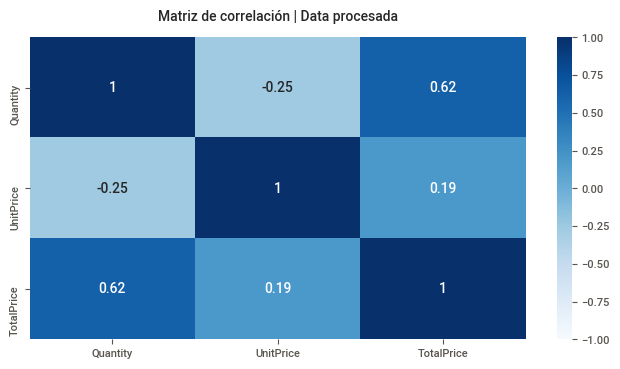

In [198]:
# Análsiis de correlación
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(df_processed.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Matriz de correlación | Data procesada', fontdict={'fontsize':10}, pad=12);

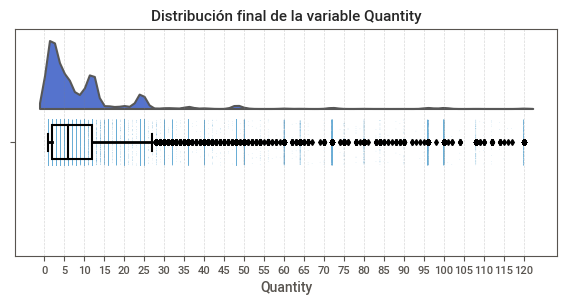

In [199]:
# Quantity Procesada
box_plot_eda(df_processed, dx='Quantity', title='Distribución final de la variable Quantity', xticks=range(0,121,5), size=(7,3))

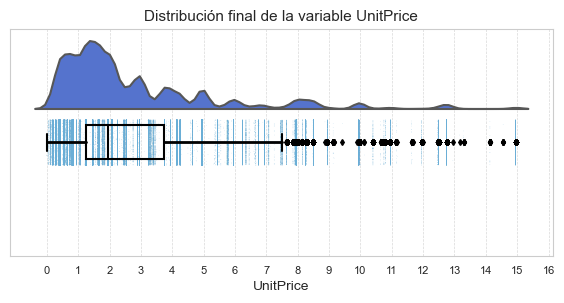

In [200]:
# Unitprice Procesada
box_plot_eda(df_processed, dx='UnitPrice', title='Distribución final de la variable UnitPrice', xticks=range(0,17,1), size=(7,3))

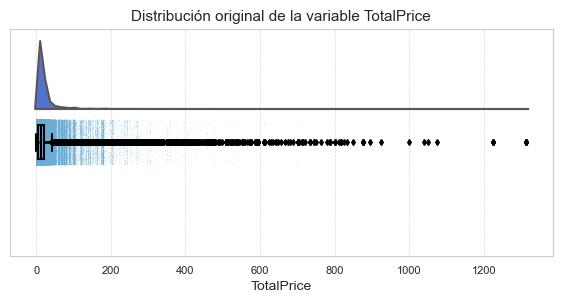

In [201]:
# TotalPrice Procesada
box_plot_eda(df_processed, dx='TotalPrice', title='Distribución original de la variable TotalPrice', size=(7,3))

##### Tratamiento outliers variable TotalPrice

In [202]:
# Revisando outliers para esta nueva variable numérica creada

l_quantiles = [0, .1, .5, .9, 0.95, .99, .999, 1]

df6_t = df_processed.copy()

df_quantile1 = df6_t['TotalPrice'].quantile(l_quantiles).reset_index().rename(columns={'index':'quantile'})

n_TotalPrice = []

for q in l_quantiles:
  n_TotalPrice.append(df6_t[df6_t['TotalPrice']<=df6_t['TotalPrice'].quantile(q)].shape[0])

d = {
    'quantile' : l_quantiles,
    'n_TotalPrice': n_TotalPrice
}

df_freq_quantiles = pd.DataFrame(d)
df_quantile1['quantile'] = df_quantile1['quantile'].astype(str)
df_freq_quantiles['quantile'] = df_freq_quantiles['quantile'].astype(str)

df_quantile2 = df_quantile1.merge(df_freq_quantiles, how='inner', left_on='quantile', right_on='quantile')
df_quantile2

quantile  TotalPrice  n_TotalPrice
0      0.0       0.001             4
1      0.1       1.950         38956
2      0.5      11.700        192957
3      0.9      33.000        346942
4     0.95      59.400        366253
5     0.99     158.400        381269
6    0.999     350.400        384711
7      1.0    1314.000        385081

In [203]:
# Eliminamos ese 0.1% de información que posee un TotalPrice > 350.400 euros y nos quedamos con el 99.9% de la información

df_processed_pre = df_processed.copy()

TotalPrice_q999 = df_processed['TotalPrice'].quantile(0.999)

print(f'Quantil 0.999 para variable TotalPrice: {TotalPrice_q999}')

print(f"1 % outliers en variable Quantity : {df_processed[df_processed['TotalPrice'] > TotalPrice_q999].shape[0]}")

df_processed = df_processed[df_processed['TotalPrice'] <= TotalPrice_q999].reset_index(drop=True)

print(f'\nShape inicial: {df_processed_pre.shape}')
print(f'Shape final: {df_processed.shape}')

print(f'\nSe eliminan {df_processed_pre.shape[0]-df_processed.shape[0]} registros por contener outliers en la variable numérica TotalPrice')

Quantil 0.999 para variable TotalPrice: 350.4
1 % outliers en variable Quantity : 370

Shape inicial: (385081, 21)
Shape final: (384711, 21)

Se eliminan 370 registros por contener outliers en la variable numérica TotalPrice


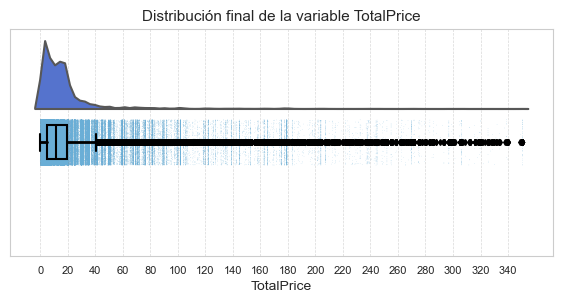

In [204]:
# TotalPrice Procesada
box_plot_eda(df_processed, dx='TotalPrice', title='Distribución final de la variable TotalPrice', size=(7,3), xticks=range(0,351,20))

#### 4.1.2. Variables categóricas procesadas

In [205]:
from pickle import LONG4
# Revisando cierta estadística descriptiva de las variables categóricas (object)
l1= []
l2= []
l3= []
l4= []


for cat_variable in df_processed.select_dtypes(include=['object']).columns:
    l1.append(cat_variable)
    l2.append(df_processed[cat_variable].mode()[0])
    l3.append(df_processed[df_processed[cat_variable] ==df_processed[cat_variable].mode()[0]].shape[0])
    l4.append((df_processed[df_processed[cat_variable] ==df_processed[cat_variable].mode()[0]].shape[0])/(df_processed[cat_variable].shape[0]))
    
d = {'Variable': l1, 'Moda': l2, 'Frecuencia': l3, 'Proporcion': l4}
pd.DataFrame(d)

Variable                                Moda  Frecuencia  Proporcion
0      InvoiceNo                              576339         525    0.001365
1      StockCode                              85123A        1986    0.005162
2    Description  WHITE HANGING HEART T-LIGHT HOLDER        1979    0.005144
3     CustomerID                               17841        7642    0.019864
4        Country                      United Kingdom      343987    0.894144
5           Date                          2011-11-06        3316    0.008619
6         Period                             2011-11       62097    0.161412
7           Year                                2011      359517    0.934512
8          Month                                  11       62097    0.161412
9           Week                                  48       20575    0.053482
10       WeekDay                                   3       77299    0.200927
11  WeekDay_Desc                            Thursday       77299    0.200927
12           Day                                  06       17799    0.046266
13          Time                            13:35:00        1783    0.004635
14          Hour                                  12       69685    0.181136
15       Minutes                                  41        7802    0.020280
16       Seconds                                  00      384711    1.000000

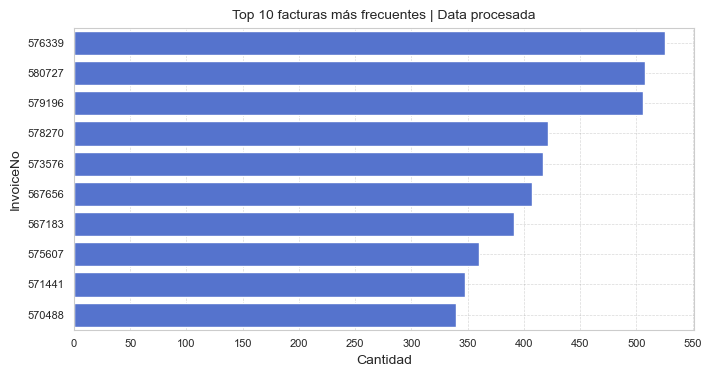

In [206]:
# InvoiceNo
barplot_topN(df_processed, dy='InvoiceNo', title='Top 10 facturas más frecuentes | Data procesada', top_n=10, xticks=range(0,551,50))

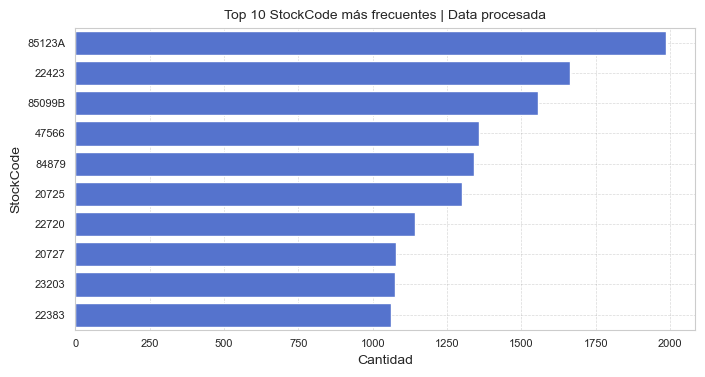

In [207]:
# StockCode
barplot_topN(df_processed, dy='StockCode', title='Top 10 StockCode más frecuentes | Data procesada', color='royalblue')

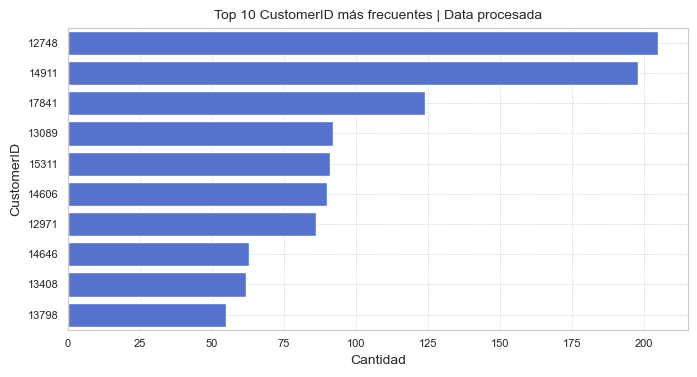

In [208]:
# CustomerID (únicos)
df_grouped = df_processed.copy()
df_grouped.drop_duplicates(keep='last',inplace=True)
df_grouped = df_grouped.reset_index(drop=True)

df_grouped = pd.DataFrame(df_grouped.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)).reset_index().rename(columns={'InvoiceNo':'Cantidad'})
barplot_topN(df_grouped, dy='CustomerID', title='Top 10 CustomerID más frecuentes | Data procesada', color='royalblue', grouped=True, df_grouped= df_grouped, xticks=range(0,215,25))

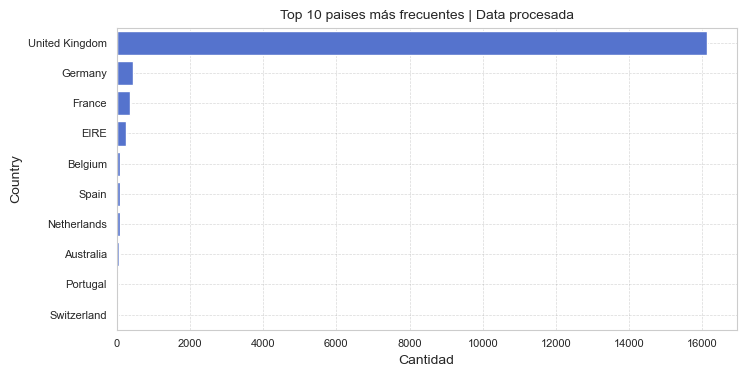

In [209]:
# Country
df_grouped = df_processed.copy()
df_grouped.drop_duplicates(keep='last',inplace=True)
df_grouped = df_grouped.reset_index(drop=True)

df_grouped = pd.DataFrame(df_grouped.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)).reset_index().rename(columns={'InvoiceNo':'Cantidad'})
barplot_topN(df_grouped, dy='Country', title='Top 10 paises más frecuentes | Data procesada', color='royalblue', grouped=True, df_grouped= df_grouped, xticks=range(0,17001,2000))

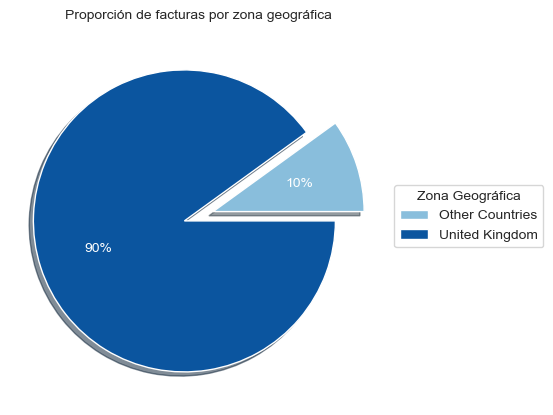

In [210]:
df_eda_country = df_grouped.copy()
df_eda_country['Segmentacion_por_Country'] = df_eda_country['Country'].apply(lambda x: x if x=='United Kingdom' else 'Other Countries')

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))
df_grouped3 = df_eda_country.groupby('Segmentacion_por_Country')['Cantidad'].sum().reset_index()
df_grouped3 = df_grouped3.rename(columns={'Segmentacion_por_Country':'Zona Geográfica'})

zonas = [i for i in df_grouped3['Zona Geográfica']]
wedges, texts, autotexts = ax.pie(df_grouped3['Cantidad'], labels = df_grouped3['Zona Geográfica'], colors = [sns.color_palette('Blues')[2],sns.color_palette('Blues')[5]]
                                    , autopct='%.0f%%', labeldistance=None, explode=[0.1,0.1], shadow=True,textprops=dict(color="w"))

plt.setp(autotexts, size=10)
ax.set_title("Proporción de facturas por zona geográfica", fontdict={'fontsize':10})
ax.legend(wedges, zonas,
          title="Zona Geográfica",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

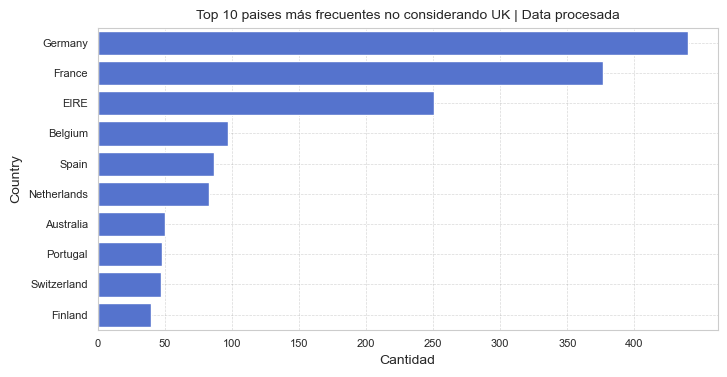

In [211]:
# Si quitamos UK de esto 
df_not_uk = df_grouped[df_grouped['Country']!='United Kingdom'].reset_index(drop=True)
barplot_topN(df_not_uk, dy='Country', title='Top 10 paises más frecuentes no considerando UK | Data procesada', color='royalblue', grouped=True, df_grouped= df_not_uk, xticks=range(0,401,50))

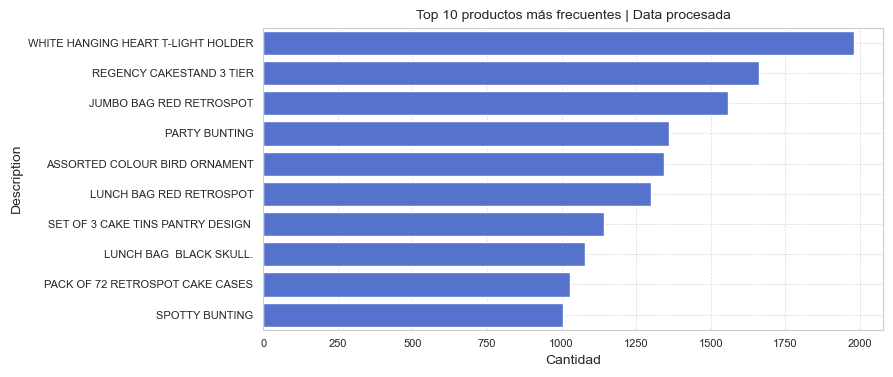

In [212]:
# Description | Productos
barplot_topN(df_processed, dy='Description', title='Top 10 productos más frecuentes | Data procesada', color='royalblue')

#### 4.1.3. Variables datetime procesadas

In [213]:
# Revisando la variable "InvoiceDate" relacionada con la temporalidad de los registros
var = 'InvoiceDate'

d = {'Variable':var, 
     'MinDate':[df_processed[var].min()], 
     'MaxDate':[df_processed[var].max()], 
     'Moda': [df_processed[var].mode()[0]] , 
     'Frecuecia':[df_processed[df_processed[cat_variable] ==df_processed[cat_variable].mode()[0]].shape[0]]}
     
pd.DataFrame(d)

Variable             MinDate             MaxDate                Moda  \
0  InvoiceDate 2010-12-01 08:26:00 2011-12-09 12:50:00 2011-11-14 15:27:00   

   Frecuecia  
0     384711

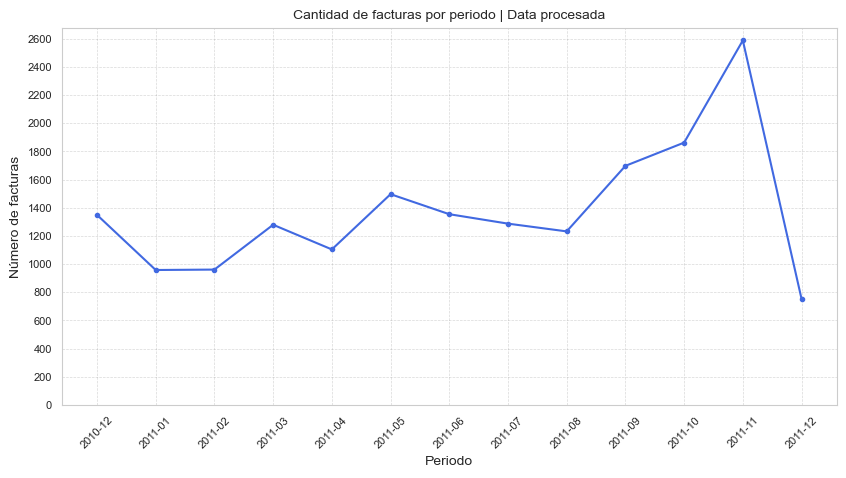

In [214]:
# Periodo | Cantidad facturas
grouped = pd.DataFrame(df_processed.groupby('Period')['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad Facturas'})

lineplot_timeline(df=grouped,dx='Period',dy='Cantidad Facturas', pal='Blues', color='royalblue', title='Cantidad de facturas por periodo | Data procesada'
                  , xlabel='Periodo', ylabel='Número de facturas', yticks=range(0,2601,200),size=(10,5))

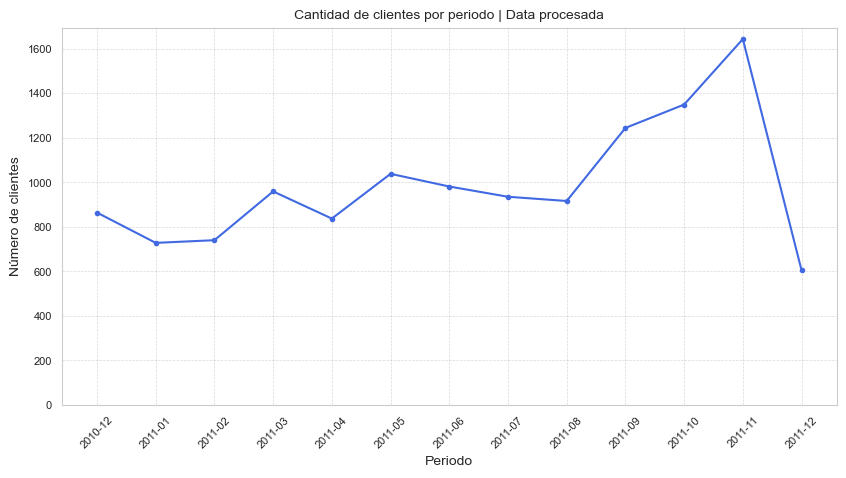

In [215]:
# Periodo | Cantidad clientes
grouped = pd.DataFrame(df_processed.groupby('Period')['CustomerID'].nunique()).reset_index().rename(columns={'CustomerID':'Cantidad Clientes'})

lineplot_timeline(df=grouped,dx='Period',dy='Cantidad Clientes', pal='Blues', color='royalblue', title='Cantidad de clientes por periodo | Data procesada'
                  , xlabel='Periodo', ylabel='Número de clientes', yticks=range(0,1601,200),size=(10,5))

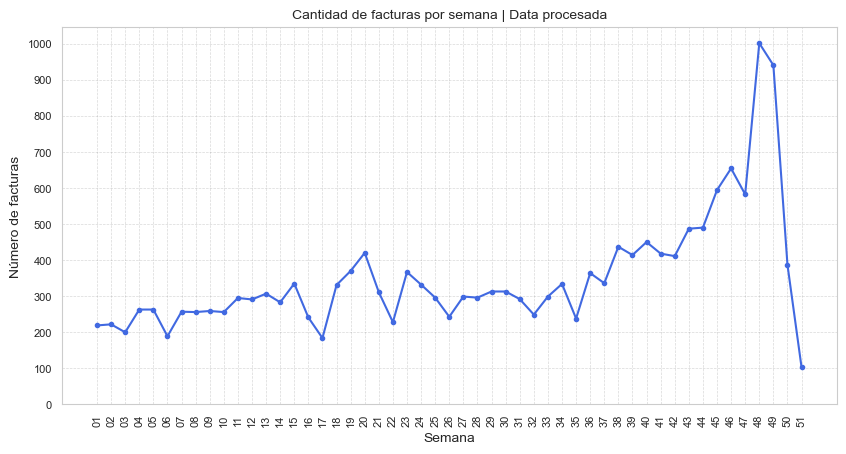

In [216]:
# Week | Cantidad facturas
grouped = pd.DataFrame(df_processed.groupby('Week')['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad Facturas'})

lineplot_timeline(df=grouped,dx='Week',dy='Cantidad Facturas', pal='Blues', color='royalblue', title='Cantidad de facturas por semana | Data procesada'
                  , xlabel='Semana', ylabel='Número de facturas', rot=90, yticks=range(0,1001,100), size=(10,5))

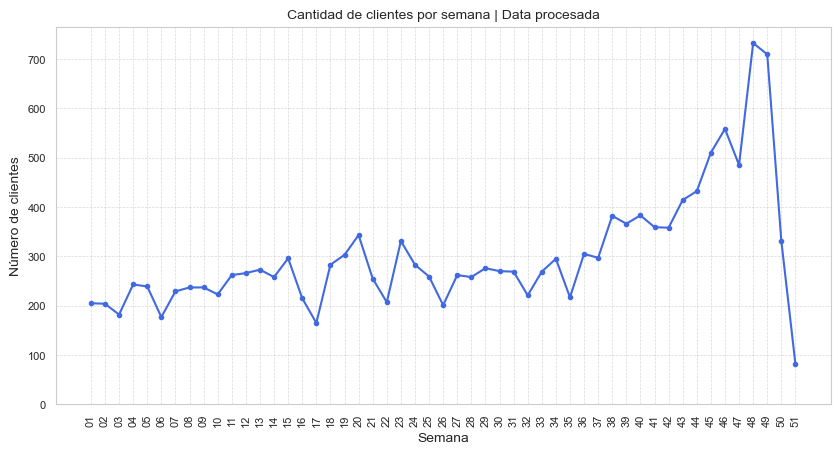

In [217]:
# Week | Cantidad clientes
grouped = pd.DataFrame(df_processed.groupby('Week')['CustomerID'].nunique()).reset_index().rename(columns={'CustomerID':'Cantidad Clientes'})

lineplot_timeline(df=grouped,dx='Week',dy='Cantidad Clientes', pal='Blues', color='royalblue', size=(10, 5), title='Cantidad de clientes por semana | Data procesada'
                  , xlabel='Semana', ylabel='Número de clientes', rot=90, yticks=range(0,701,100))

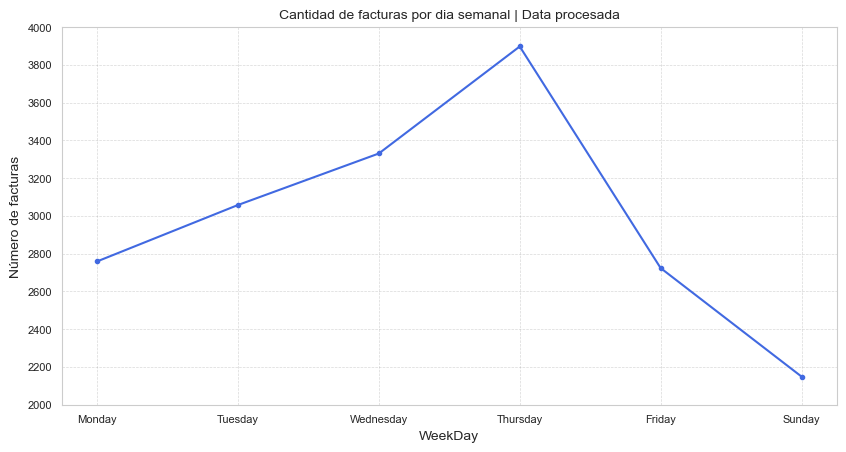

In [218]:
# WeekDay
grouped = pd.DataFrame(df_processed.groupby(['WeekDay_Desc','WeekDay'])['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad Facturas'}).sort_values(by='WeekDay')

lineplot_timeline(df=grouped,dx='WeekDay_Desc',dy='Cantidad Facturas', pal='Blues', color='royalblue', size=(10, 5), title='Cantidad de facturas por dia semanal | Data procesada'
                  , xlabel='WeekDay', ylabel='Número de facturas', rot=0, yticks=range(2000,4001,200)) # , yticks=range(0,4001,400)

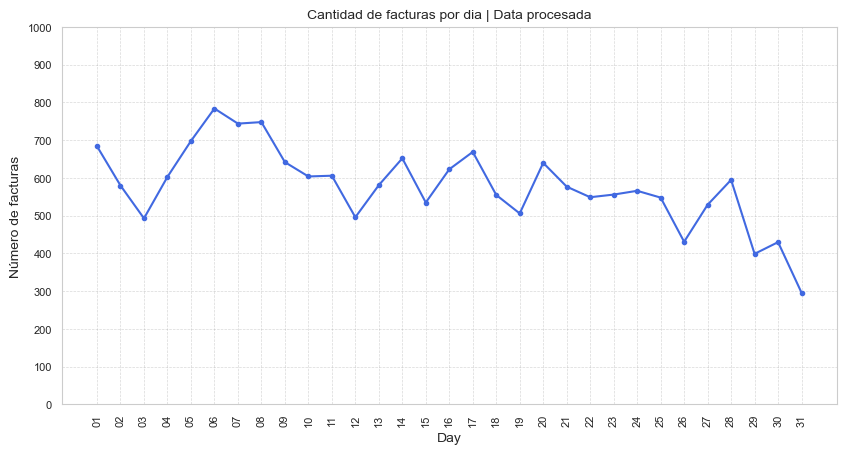

In [219]:
# Day
grouped = pd.DataFrame(df_processed.groupby('Day')['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad Facturas'})

lineplot_timeline(df=grouped,dx='Day',dy='Cantidad Facturas', pal='Blues', color='royalblue', size=(10, 5), title='Cantidad de facturas por dia | Data procesada'
                  , xlabel='Day', ylabel='Número de facturas', rot=90, yticks=range(0,1001,100))

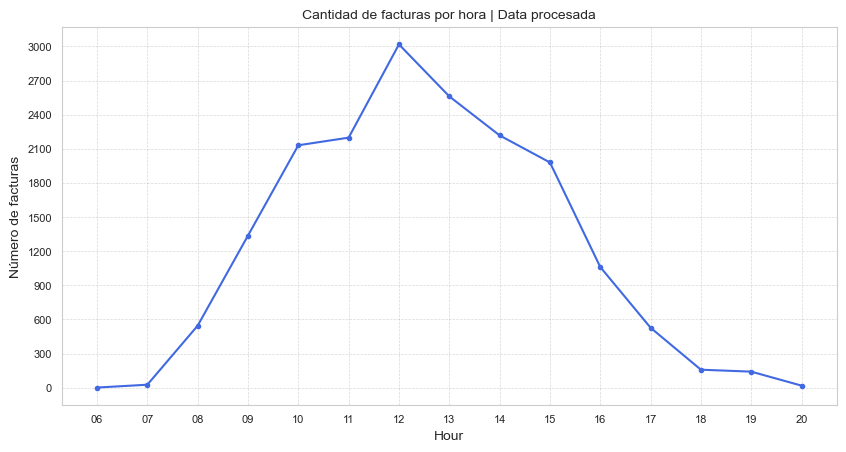

In [220]:
# Hour
grouped = pd.DataFrame(df_processed.groupby('Hour')['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad Facturas'})

lineplot_timeline(df=grouped,dx='Hour',dy='Cantidad Facturas', pal='Blues', color='royalblue', size=(10, 5), title='Cantidad de facturas por hora | Data procesada'
                  , xlabel='Hour', ylabel='Número de facturas', rot=0, yticks=range(0,3001, 300))

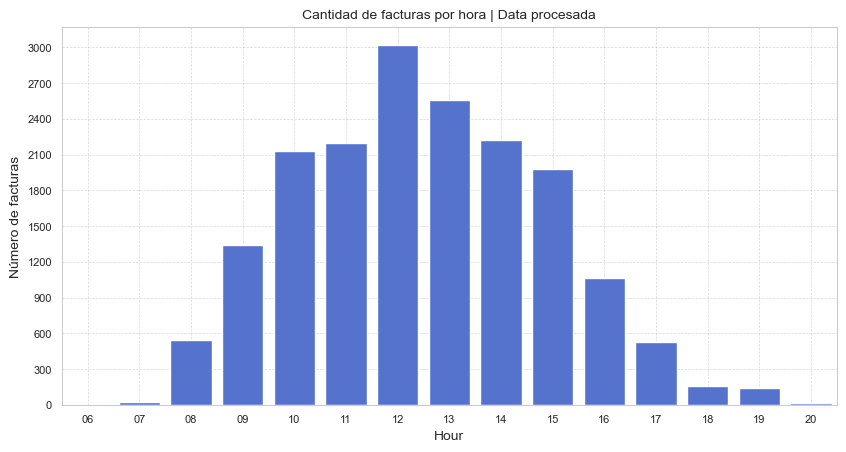

In [221]:
# Hour
grouped = pd.DataFrame(df_processed.groupby('Hour')['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad'})

barplot_topN(grouped, dx='Hour', dy=None, title='Cantidad de facturas por hora | Data procesada', grouped=True, df_grouped= grouped, top_n=None,
            horizontal=False, yticks=range(0,3001,300), xlabel='Hour', ylabel='Número de facturas', size=(10,5))

### 4.2. Análisis bivariado

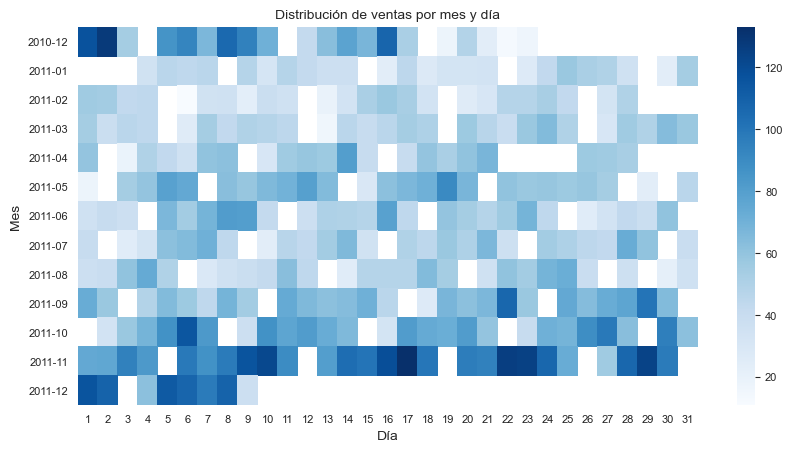

In [222]:
# Distribución de ventas por periodo y dia
grouped = pd.DataFrame(df_processed.groupby(['Period','Day'])['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad'})
grouped['Day'] = grouped['Day'].astype(int)
grouped = grouped.pivot('Period', 'Day', 'Cantidad')

plt.figure(figsize=(10,5))
heatmap = sns.heatmap(grouped, cmap='Blues')
plt.title("Distribución de ventas por mes y día", fontsize=10)
plt.xlabel("Día")
plt.ylabel("Mes");

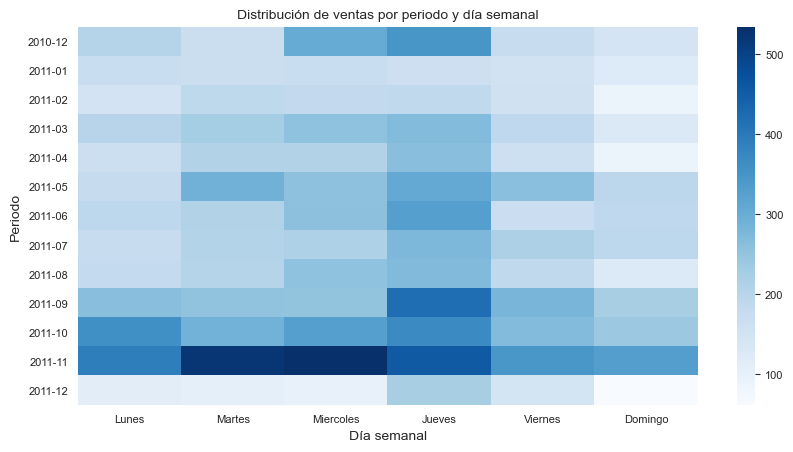

In [223]:
# Distribución de ventas por periodo y dia semanal
grouped = pd.DataFrame(df_processed.groupby(['Period','WeekDay'])['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad'}).sort_values(by='WeekDay')
grouped['WeekDay'] = grouped['WeekDay'].astype(int)
grouped = grouped.pivot('Period', 'WeekDay', 'Cantidad')
d = {0:'Lunes',
     1:'Martes',
     2:'Miercoles',
     3:'Jueves',
     4:'Viernes',
     5:'Sabado',
     6:'Domingo'
    }
grouped = grouped.rename(columns=d)

plt.figure(figsize=(10,5))
heatmap = sns.heatmap(grouped, cmap='Blues')
plt.title("Distribución de ventas por periodo y día semanal" ,fontsize=10)
plt.yticks(rotation=0)
plt.xlabel("Día semanal")
plt.ylabel("Periodo");

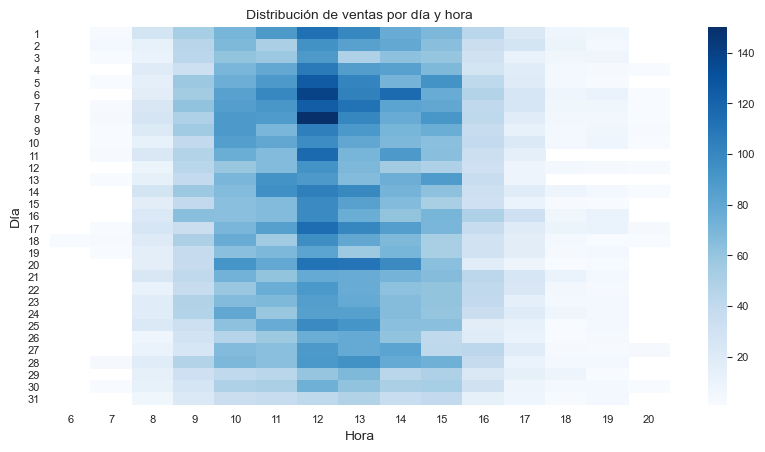

In [224]:
# Distribución de ventas por dia y hora
grouped = pd.DataFrame(df_processed.groupby(['Day','Hour'])['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad'})
grouped = grouped.astype(int)
grouped = grouped.pivot('Day', 'Hour', 'Cantidad')

plt.figure(figsize=(10,5))
heatmap = sns.heatmap(grouped, cmap='Blues')
plt.title("Distribución de ventas por día y hora", fontsize=10)
plt.xlabel("Hora")
plt.ylabel("Día");

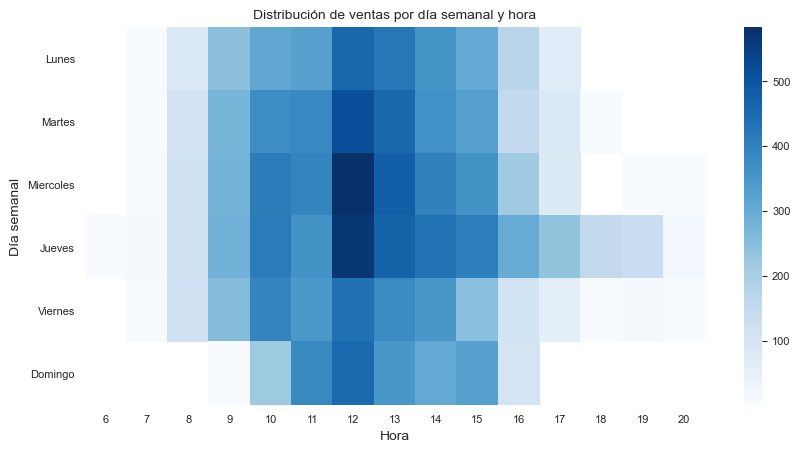

In [225]:
# Distribución de ventas por dia semanal y hora
grouped = pd.DataFrame(df_processed.groupby(['WeekDay','Hour'])['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad'}).sort_values(by='WeekDay')
grouped['WeekDay'] = grouped['WeekDay'].astype(int)
grouped['Hour'] = grouped['Hour'].astype(int)
grouped = grouped.pivot('WeekDay', 'Hour', 'Cantidad')
d = {0:'Lunes',
     1:'Martes',
     2:'Miercoles',
     3:'Jueves',
     4:'Viernes',
     5:'Sabado',
     6:'Domingo'
    }
grouped = grouped.rename(index=d)

plt.figure(figsize=(10,5))
heatmap = sns.heatmap(grouped, cmap='Blues')
plt.title("Distribución de ventas por día semanal y hora",fontsize=10)
plt.yticks(rotation=0)
plt.xlabel("Hora")
plt.ylabel("Día semanal");

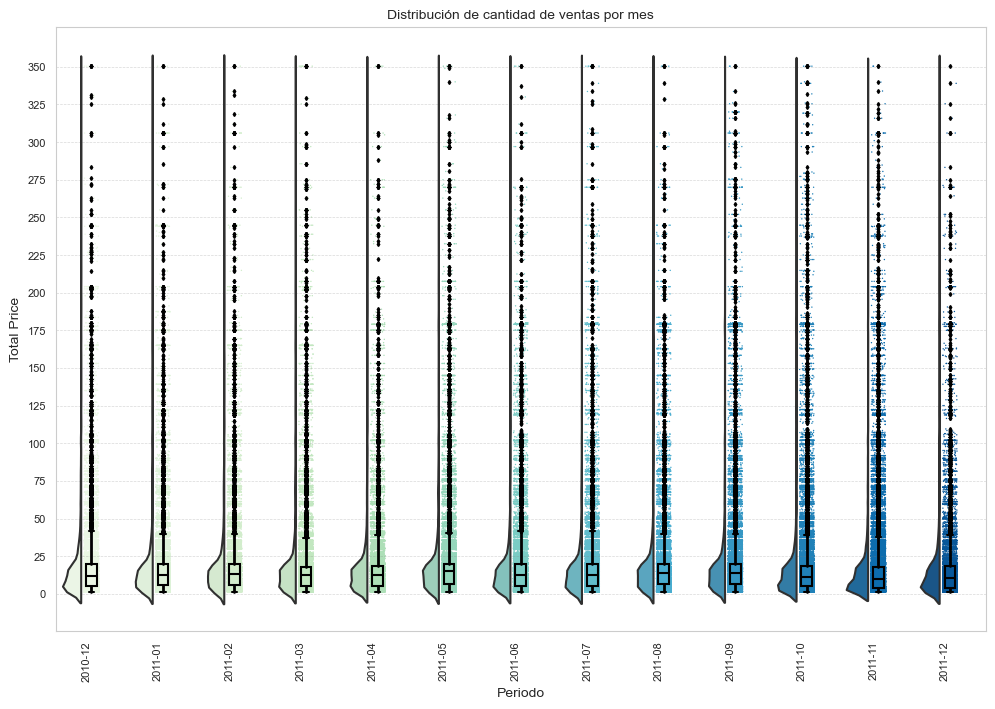

In [226]:
# Cantidad de ventas por periodo <= 800
f, ax = plt.subplots(figsize=(12, 8))
df = df_processed.copy()
df = df[(df['TotalPrice']>=1) & (df['TotalPrice']<=800)]

pal = "GnBu" #GnBu #Set2 #RdBu
dx = "Period"
dy = "TotalPrice"
# df = df_processed

ax = pt.half_violinplot( x = dx, y = dy, data = df, width = .6, palette = pal, scale = "area", inner = None)
ax = sns.stripplot( x = dx, y = dy, data = df, jitter=1, palette = pal, edgecolor = "white", size = 1 , zorder = 0)
ax = sns.boxplot(x=dx, y=dy,data = df, width = .15, color = "black", zorder = 10, showcaps = True, fliersize=2,
                 boxprops = {'facecolor':'none', "zorder":10}, showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},saturation = 1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Distribución de cantidad de ventas por mes',fontsize=10)
plt.ylabel('Total Price')
plt.xlabel('Periodo')
plt.yticks(range(0,351,25))
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.3)
plt.show()

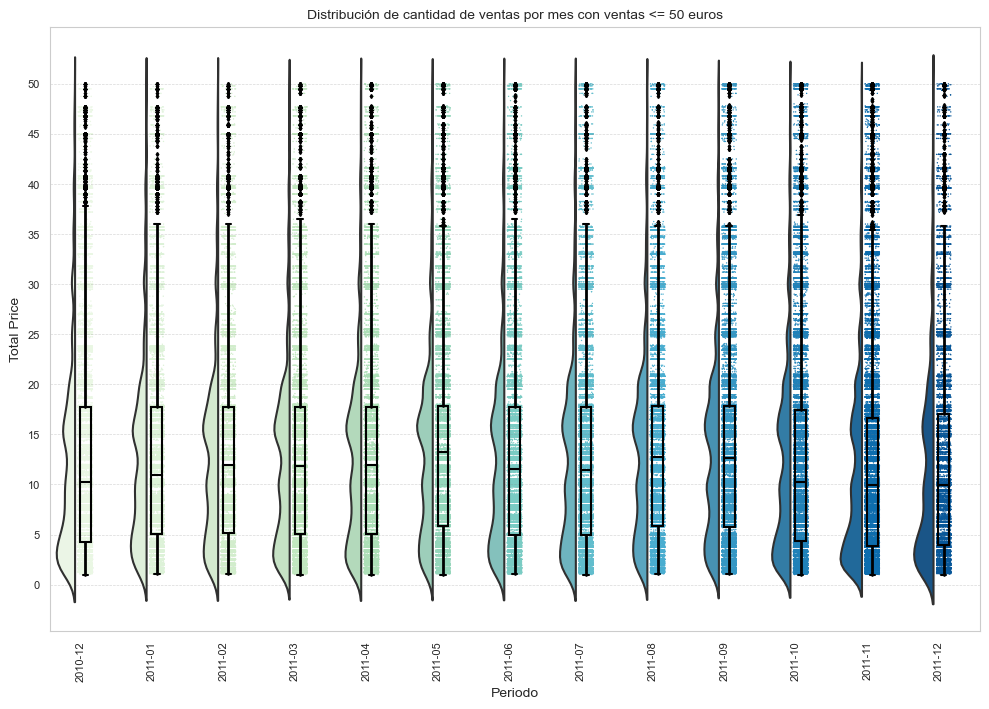

In [227]:
# Cantidad de ventas por periodo <= 50
f, ax = plt.subplots(figsize=(12, 8))
df = df_processed.copy()
df = df[(df['TotalPrice']>=1) & (df['TotalPrice']<=50)]

pal = "GnBu" #GnBu #Set2 #RdBu
color = 'royalblue'
dx = "Period"
dy = "TotalPrice"
# df = df_processed

ax = pt.half_violinplot( x = dx, y = dy, data = df, width = .6, palette = pal, scale = "area", inner = None)
ax = sns.stripplot( x = dx, y = dy, data = df, jitter=1, palette = pal, edgecolor = "white", size = 1 , zorder = 0)
ax = sns.boxplot(x=dx, y=dy,data = df, width = .15, color = "black", zorder = 10, showcaps = True, fliersize=2,
                 boxprops = {'facecolor':'none', "zorder":10}, showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},saturation = 1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Distribución de cantidad de ventas por mes con ventas <= 50 euros',fontsize=10)
plt.ylabel('Total Price')
plt.xlabel('Periodo')
plt.yticks(range(0,51,5))
plt.xticks(rotation=90)
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.3)
plt.show()

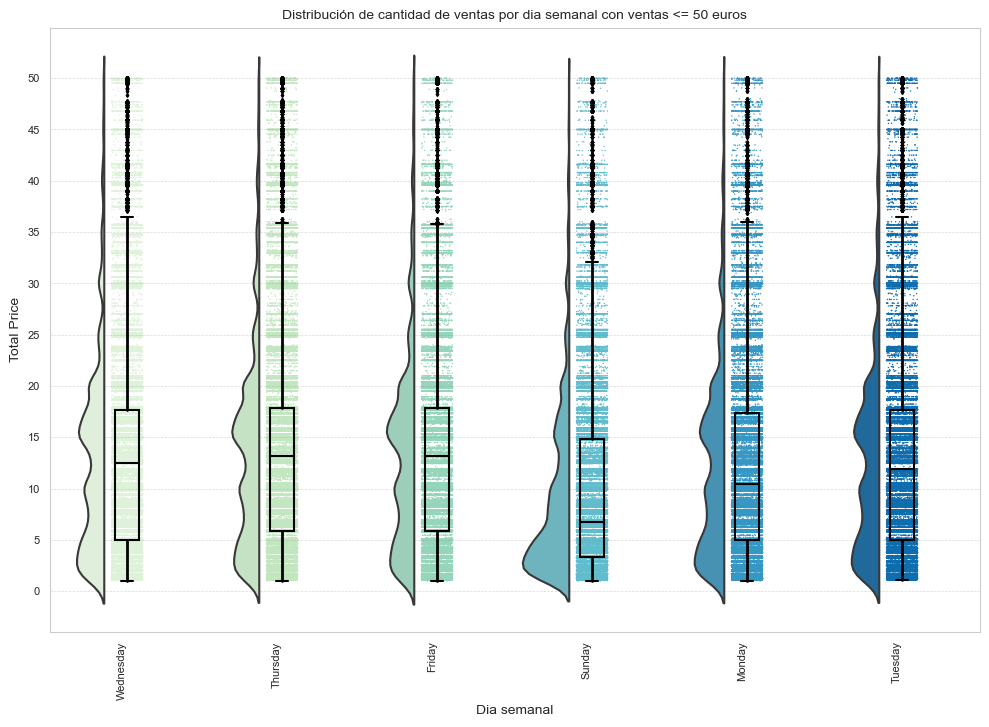

In [228]:
# Cantidad de ventas por periodo  con TotalPrice <= 50
f, ax = plt.subplots(figsize=(12, 8))
df = df_processed.copy()
df = df[(df['TotalPrice']>=1) & (df['TotalPrice']<=50)]

pal = "GnBu" #GnBu #Set2 #RdBu
color = 'royalblue'
dx = "WeekDay_Desc"
dy = "TotalPrice"
# df = df_processed

ax = pt.half_violinplot( x = dx, y = dy, data = df, width = .6, palette = pal, scale = "area", inner = None)
ax = sns.stripplot( x = dx, y = dy, data = df, jitter=1, palette = pal, edgecolor = "white", size = 1 , zorder = 0)
ax = sns.boxplot(x=dx, y=dy,data = df, width = .15, color = "black", zorder = 10, showcaps = True, fliersize=2,
                 boxprops = {'facecolor':'none', "zorder":10}, showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},saturation = 1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Distribución de cantidad de ventas por dia semanal con ventas <= 50 euros',fontsize=10)
plt.ylabel('Total Price')
plt.xlabel('Dia semanal')
plt.yticks(range(0,51,5))
plt.xticks(rotation=90)
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.3)
plt.show()

### 4.3. Análisis RFMA

- Recencia: cuán reciente es su última compra.
- Frecuencia: cuántas veces han comprado durante el periodo analizado.
- Gasto: qué tanto dinero han gastado los clientes hasta ahora.
- Antigüedad: hace cuánto tiempo fue su primera compra.


In [229]:
# Recencia
df_rfm_1 = df_processed.copy()

## Agrupar los consumidores según su última compra
df_rfm_1 = df_rfm_1.groupby(by='CustomerID', as_index=False)['Date'].max()
df_rfm_1.columns = ['CustomerID','LastPurchaseDate']
df_rfm_1['LastPurchaseDate'] = pd.to_datetime(df_rfm_1['LastPurchaseDate'], format='%Y-%m-%d')

## Elegir la fecha más reciente como el today, para hacer todos los análisis posteriores
now = df_rfm_1['LastPurchaseDate'].max()
print(f'Now: {now}')

## Agregar la variable de Recencia
df_rfm_1['Recency'] = df_rfm_1['LastPurchaseDate'].apply(lambda x: (now - x).days)

df_rfm_1.head()

Now: 2011-12-09 00:00:00


CustomerID LastPurchaseDate  Recency
0      12347       2011-12-07        2
1      12348       2011-09-25       75
2      12349       2011-11-21       18
3      12350       2011-02-02      310
4      12352       2011-11-03       36

In [230]:
# Frecuencia 
df_rfm_2 = df_processed.copy()

## Limpiando la base
df_rfm_2 = df_rfm_2.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first") 

## Calculando la frecuencia por CustomerID
df_rfm_2 = df_rfm_2.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
df_rfm_2.columns = ['CustomerID','Frequency']

df_rfm_2.head()

CustomerID  Frequency
0      12347          7
1      12348          4
2      12349          1
3      12350          1
4      12352          7

In [231]:
# Gasto 
df_rfm_3 = df_processed.copy()

## Calculando la frecuencia por CustomerID
df_rfm_3 = df_rfm_3.groupby('CustomerID',as_index=False)['TotalPrice'].sum()
df_rfm_3.columns = ['CustomerID','Monetary']

df_rfm_3.head()

CustomerID  Monetary
0      12347   4060.40
1      12348   1186.68
2      12349   1353.80
3      12350    294.40
4      12352   1385.74

In [232]:
# Antiguedad
df_rfm_4 = df_processed.copy()

## Agrupar los consumidores según su primera compra
df_rfm_4 = df_rfm_4.groupby(by='CustomerID', as_index=False)['Date'].min()
df_rfm_4.columns = ['CustomerID','FirstPurchaseDate']
df_rfm_4['FirstPurchaseDate'] = pd.to_datetime(df_rfm_4['FirstPurchaseDate'], format='%Y-%m-%d')

## Agregar la variable de Recencia
df_rfm_4['Antiquity'] = df_rfm_4['FirstPurchaseDate'].apply(lambda x: (now - x).days)

df_rfm_4.head()

CustomerID FirstPurchaseDate  Antiquity
0      12347        2010-12-07        367
1      12348        2010-12-16        358
2      12349        2011-11-21         18
3      12350        2011-02-02        310
4      12352        2011-02-16        296

In [233]:
# Consolidando la información

df_rfma = df_rfm_1.merge(df_rfm_2, how='inner',left_on='CustomerID', right_on='CustomerID')
df_rfma = df_rfma.merge(df_rfm_3, how='inner',left_on='CustomerID', right_on='CustomerID')
df_rfma = df_rfma.merge(df_rfm_4, how='inner',left_on='CustomerID', right_on='CustomerID')

df_rfma.insert(1, 'FirstPurchaseDate',df_rfma.pop('FirstPurchaseDate'))
df_rfma

CustomerID FirstPurchaseDate LastPurchaseDate  Recency  Frequency  \
0         12347        2010-12-07       2011-12-07        2          7   
1         12348        2010-12-16       2011-09-25       75          4   
2         12349        2011-11-21       2011-11-21       18          1   
3         12350        2011-02-02       2011-02-02      310          1   
4         12352        2011-02-16       2011-11-03       36          7   
...         ...               ...              ...      ...        ...   
4282      18280        2011-03-07       2011-03-07      277          1   
4283      18281        2011-06-12       2011-06-12      180          1   
4284      18282        2011-08-05       2011-12-02        7          2   
4285      18283        2011-01-06       2011-12-06        3         16   
4286      18287        2011-05-22       2011-10-28       42          3   

      Monetary  Antiquity  
0      4060.40        367  
1      1186.68        358  
2      1353.80         18  
3       294.40        310  
4      1385.74        296  
...        ...        ...  
4282    180.60        277  
4283     46.92        180  
4284    178.05        126  
4285   2029.58        337  
4286   1837.28        201  

[4287 rows x 7 columns]

In [234]:
# Base solo de RFMA
rfm = df_rfma.copy()
rfm = rfm.drop(columns=['FirstPurchaseDate','LastPurchaseDate'])
rfm = rfm.set_index('CustomerID')
rfm.head()

Recency  Frequency  Monetary  Antiquity
CustomerID                                         
12347             2          7   4060.40        367
12348            75          4   1186.68        358
12349            18          1   1353.80         18
12350           310          1    294.40        310
12352            36          7   1385.74        296

In [235]:
# Quartiles RFM
quantile_rfm = rfm.quantile(q=[0.25,0.5,0.75])
quantile_rfm.head()

Recency  Frequency  Monetary  Antiquity
0.25     17.0        1.0   286.890      112.0
0.50     50.0        2.0   627.150      248.0
0.75    142.5        5.0  1535.015      326.0

In [236]:
# Clasificandolos en base a sus carácteristicas RFM 

## Funciones
def RScore(x,p,d):
  """
  Función que permite clasificar a los clientes en base a su recencia. Mientras más bajo significa que su Recencia es menor, por lo tanto es de mayor interes
  (x = valor, p = recency, d= cuartil)
  """
  if x <= d[p][0.25]:
      return 1
  elif x <= d[p][0.50]:
      return 2
  elif x <= d[p][0.75]: 
      return 3
  else:
      return 4
    
def FMScore(x,p,d):
  """
  Función que permite clasificar a los clientes en base a su Frecuencia, Gasto y Antiguedad. Mientras más alto el indicador, significa el indicador es de mayor importancia.
  (x = valor, p = frequency, monetary, antiquity , d= cuartil)
  """
  if x <= d[p][0.25]:
      return 4
  elif x <= d[p][0.50]:
      return 3
  elif x <= d[p][0.75]: 
      return 2
  else:
      return 1

## Aplicación Quantile en RFM
rfm['R_Quantile'] = rfm['Recency'].apply(RScore,args=('Recency',quantile_rfm))
rfm['F_Quantile'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quantile_rfm))
rfm['M_Quantile'] = rfm['Monetary'].apply(FMScore, args=('Monetary',quantile_rfm))
rfm['A_Quantile'] = rfm['Antiquity'].apply(FMScore, args=('Antiquity',quantile_rfm))

## Obtención clasificacion RFM

rfm['RFMScore'] = rfm.R_Quantile.map(str) + rfm.F_Quantile.map(str)  + rfm.M_Quantile.map(str)
rfm = rfm.reset_index()
rfm.head()

CustomerID  Recency  Frequency  Monetary  Antiquity  R_Quantile  F_Quantile  \
0      12347        2          7   4060.40        367           1           1   
1      12348       75          4   1186.68        358           3           2   
2      12349       18          1   1353.80         18           2           4   
3      12350      310          1    294.40        310           4           4   
4      12352       36          7   1385.74        296           2           1   

   M_Quantile  A_Quantile RFMScore  
0           1           1      111  
1           2           1      322  
2           2           4      242  
3           3           2      443  
4           2           2      212

In [237]:
print("Mejores Clientes: ",len(rfm[rfm['RFMScore']=='111']))
print('Clientes Leales: ',len(rfm[rfm['F_Quantile']==1]))
print("Grandes Gastadores: ",len(rfm[rfm['M_Quantile']==1]))
print('Casi Perdidos: ', len(rfm[rfm['RFMScore']=='134']))
print('Clientes Perdidos: ',len(rfm[rfm['RFMScore']=='344']))
print('Clientes Baratos Perdidos: ',len(rfm[rfm['RFMScore']=='444']))
print('Clientes Antiguos: ',len(rfm[rfm['A_Quantile']==1]))

Mejores Clientes:  455
Clientes Leales:  852
Grandes Gastadores:  1072
Casi Perdidos:  38
Clientes Perdidos:  203
Clientes Baratos Perdidos:  444
Clientes Antiguos:  1059


In [238]:
df_rfma_final = df_rfma.merge(rfm, how='inner',left_on=['CustomerID','Recency','Frequency','Monetary','Antiquity'] \
                              ,right_on=['CustomerID','Recency','Frequency','Monetary','Antiquity'])

df_rfma_final.head(3)

CustomerID FirstPurchaseDate LastPurchaseDate  Recency  Frequency  Monetary  \
0      12347        2010-12-07       2011-12-07        2          7   4060.40   
1      12348        2010-12-16       2011-09-25       75          4   1186.68   
2      12349        2011-11-21       2011-11-21       18          1   1353.80   

   Antiquity  R_Quantile  F_Quantile  M_Quantile  A_Quantile RFMScore  
0        367           1           1           1           1      111  
1        358           3           2           2           1      322  
2         18           2           4           2           4      242

In [239]:
df_rfma_final.shape

(4287, 12)

### 4.4. Clustering K-means

In [240]:
# Definiendo el modelo

df_clustered = df_rfma_final.copy()
kmeans_model_1 = KMeans(n_clusters=3, random_state=99)
kmeans_model_2 = KMeans(n_clusters=3, random_state=99)

df_clustered['cluster_frecuencia'] = kmeans_model_1.fit_predict(df_clustered[['Frequency']])
df_clustered['cluster_rfm'] = kmeans_model_2.fit_predict(df_clustered[['Recency','Frequency','Monetary']]) # ,'Antiquity'
df_clustered.head() 

CustomerID FirstPurchaseDate LastPurchaseDate  Recency  Frequency  Monetary  \
0      12347        2010-12-07       2011-12-07        2          7   4060.40   
1      12348        2010-12-16       2011-09-25       75          4   1186.68   
2      12349        2011-11-21       2011-11-21       18          1   1353.80   
3      12350        2011-02-02       2011-02-02      310          1    294.40   
4      12352        2011-02-16       2011-11-03       36          7   1385.74   

   Antiquity  R_Quantile  F_Quantile  M_Quantile  A_Quantile RFMScore  \
0        367           1           1           1           1      111   
1        358           3           2           2           1      322   
2         18           2           4           2           4      242   
3        310           4           4           3           2      443   
4        296           2           1           2           2      212   

   cluster_frecuencia  cluster_rfm  
0                   0            0  
1                   0            0  
2                   0            0  
3                   0            0  
4                   0            0

In [241]:
df_clustered['cluster_frecuencia'].value_counts()

0    3967
2     313
1       7
Name: cluster_frecuencia, dtype: int64

In [242]:
df_clustered['cluster_rfm'].value_counts()

0    4261
1      24
2       2
Name: cluster_rfm, dtype: int64

In [243]:
print(df_clustered['Frequency'].max())
print(df_clustered['Frequency'].min())

205
1


In [244]:
kmeans_model_1.cluster_centers_

array([[  2.84824805],
       [126.57142857],
       [ 18.31948882]])

In [245]:
kmeans_model_2.cluster_centers_

array([[9.26848158e+01, 3.86458578e+00, 1.30859114e+03],
       [8.37500000e+00, 4.96250000e+01, 3.56558567e+04],
       [1.50000000e+00, 1.30500000e+02, 1.39188250e+05]])

In [246]:
# Agregar colores a los clusters
df_master = df_clustered.copy()

## Clusters agrupados solo por la frecuencia
df_master.loc[df_master['cluster_frecuencia']==0,'color_cluster_f']='royalblue'
df_master.loc[df_master['cluster_frecuencia']==1,'color_cluster_f']='dimgray'
df_master.loc[df_master['cluster_frecuencia']==2,'color_cluster_f']='lightskyblue'

## Clusters agrupados por RFM
df_master.loc[df_master['cluster_rfm']==0,'color_cluster_rfm']='royalblue'
df_master.loc[df_master['cluster_rfm']==1,'color_cluster_rfm']='dimgray'
df_master.loc[df_master['cluster_rfm']==2,'color_cluster_rfm']='lightskyblue'


df_master.head()

CustomerID FirstPurchaseDate LastPurchaseDate  Recency  Frequency  Monetary  \
0      12347        2010-12-07       2011-12-07        2          7   4060.40   
1      12348        2010-12-16       2011-09-25       75          4   1186.68   
2      12349        2011-11-21       2011-11-21       18          1   1353.80   
3      12350        2011-02-02       2011-02-02      310          1    294.40   
4      12352        2011-02-16       2011-11-03       36          7   1385.74   

   Antiquity  R_Quantile  F_Quantile  M_Quantile  A_Quantile RFMScore  \
0        367           1           1           1           1      111   
1        358           3           2           2           1      322   
2         18           2           4           2           4      242   
3        310           4           4           3           2      443   
4        296           2           1           2           2      212   

   cluster_frecuencia  cluster_rfm color_cluster_f color_cluster_rfm  
0                   0            0       royalblue         royalblue  
1                   0            0       royalblue         royalblue  
2                   0            0       royalblue         royalblue  
3                   0            0       royalblue         royalblue  
4                   0            0       royalblue         royalblue

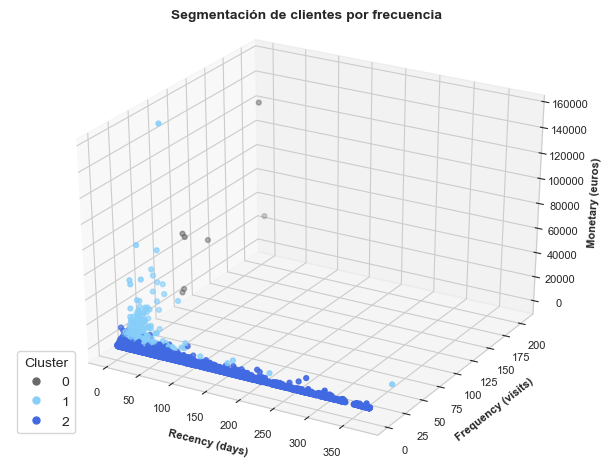

In [247]:
# Scatter plot | Segmentación de clientes por frecuencia

fig = plt.figure(figsize=(26,6))
ax= fig.add_subplot(131,projection='3d')
sc = ax.scatter(df_master['Recency'],df_master['Frequency'],df_master['Monetary'],c=df_master.color_cluster_f,s=12, marker='o')

ax.set_title('Segmentación de clientes por frecuencia', fontsize=10, pad=20, fontweight="bold")
ax.set_xlabel('Recency (days)', fontsize=8,fontweight="bold")
ax.set_ylabel('Frequency (visits)', fontsize=8,fontweight="bold")
ax.set_zlabel('Monetary (euros)', fontsize=8, fontweight="bold")

plt.grid(color='gray', linestyle='--', linewidth=0.01, axis='both', alpha=0.9)
sns.set_style("whitegrid")

# Legend
unique_colors = set(df_master.color_cluster_rfm)
handles = []
labels = []
for n, color in enumerate(unique_colors, start=0):
    artist = mpl.lines.Line2D([], [], color=color, lw=0, marker="o",markersize=5)
    handles.append(artist)
    labels.append(str(n))
legend = ax.legend(handles, labels, bbox_to_anchor=(0, 0.05), loc="lower left", title="Cluster")

plt.show()

In [248]:
# Scatter plot using Plotly agrupando clusters por frecuencia

fig = go.Figure()
DF = df_master.copy()

for C in list(np.sort(DF.cluster_frecuencia.unique())):
    
    fig.add_trace(go.Scatter3d( x = DF[DF.cluster_frecuencia == C]['Recency'],
                                y = DF[DF.cluster_frecuencia == C]['Frequency'],
                                z = DF[DF.cluster_frecuencia == C]['Monetary'],
                                mode = 'markers', 
                                name = 'Cluster ' + str(C),
                                marker=dict(size=5,
                                   color=DF[DF.cluster_frecuencia == C]['color_cluster_f'].unique()[0])
                            )
    )


fig.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Recencia (días)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frecuencia (compras)', titlefont_color = 'black'),
                                zaxis=dict(title = 'Gasto (euros)', titlefont_color = 'black')))


fig.update_layout(
    title={
        'text': "<b>Segmentación de clientes por frecuencia</b>",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(showlegend=True)

# fig.update_traces(hoverinfo="none", hovertemplate=None)

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)

## 5. Resultados

1. ¿Existen productos favoritos que compran los clientes?
2. ¿Existe algún horario específico en el que los clientes compran?
3. ¿En qué horario sugeriría refuerzo en los servidores de la tienda para evitar un colapso?
4. ¿Qué frecuencia de compra tiene un cliente de alta frecuencia?
5. ¿Cuánto debería gastar un cliente para considerarlo sobre la media?
6. ¿Cómo se distribuyen las antigüedades de los clientes?
7. Si se clasifican en 3 grupos a los clientes, en base a su frecuencia de compra ¿Qué 
diferencias existen entre cada clúster?

### 5.1. ¿Existen productos favoritos que compran los clientes?

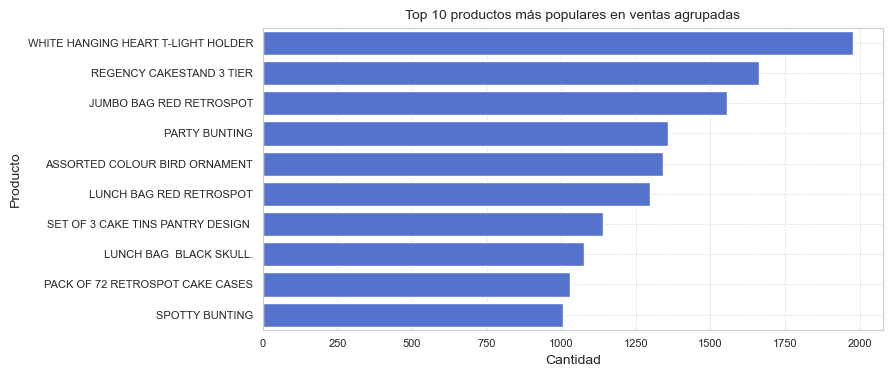

In [249]:
# Productos agrupados por factura única
df = df_processed.copy()
df.rename(columns={'Description':'Producto'},inplace=True)
barplot_topN(df, dy='Producto', title='Top 10 productos más populares en ventas agrupadas', color='royalblue')

In [250]:
df['Producto'].value_counts()[:3]

WHITE HANGING HEART T-LIGHT HOLDER    1979
REGENCY CAKESTAND 3 TIER              1663
JUMBO BAG RED RETROSPOT               1557
Name: Producto, dtype: int64

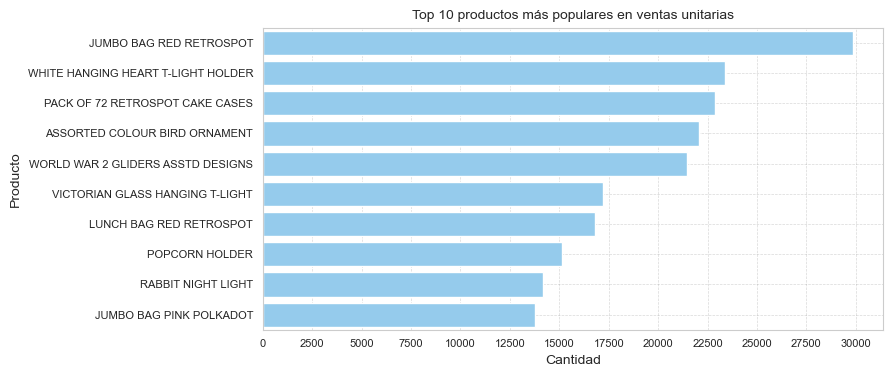

In [251]:
# Venta de productos unitarios en base total
df = df_processed.copy()
df = df.groupby('Description', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
df['Quantity'] = df['Quantity'].astype(int)
df.rename(columns={'Description':'Producto','Quantity':'Cantidad'},inplace=True)

barplot_topN(df[:10], dy='Producto', title='Top 10 productos más populares en ventas unitarias', color='lightskyblue', grouped=True, df_grouped=df[:10], xticks=range(0,30001,2500))

In [252]:
df[:3]

Producto  Cantidad
1743             JUMBO BAG RED RETROSPOT     29868
3653  WHITE HANGING HEART T-LIGHT HOLDER     23398
2245     PACK OF 72 RETROSPOT CAKE CASES     22870

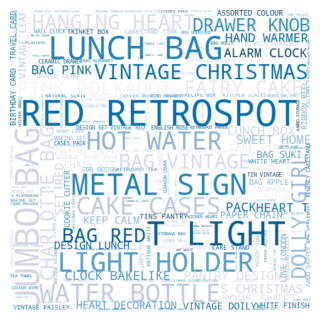

In [253]:
# Nube de palabras
corpus = ''
for sentence in df_processed['Description']:
  texto = re.sub(r'[^a-zA-Z]', ' ', sentence)
  texto = texto + ' '
  corpus = corpus + texto

corpus = re.sub(' +', ' ', corpus)

## Objeto wordcloud
wordcloud = WordCloud(width=480, height=480, margin=0,background_color='white',mode="RGBA", colormap='PuBu').generate(corpus) #, max_font_size=70, max_words=50

## Graficos
plt.figure(figsize=(4,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.title('Palabras clave de productos basados en el campo Description')
plt.show()

Si observamos en términos de productos agrupados, es decir, sin considerar la cantidad unitaria de estos si no que contandolos como conjunto por factura, vemos que los top 3 son los siguientes: 

1. WHITE HANGING HEART T-LIGHT HOLDER (1.979)
2. REGENCY CAKESTAND 3 TIER (1.663)
3. JUMBO BAG RED RETROSPOT (1.557)

Ahora si consideramos las ventas unitarias por producto, el nuevo top 3 es:

1. JUMBO BAG RED RETROSPOT	(29.868)
2. WHITE HANGING HEART T-LIGHT HOLDER (23.398)
3. PACK OF 72 RETROSPOT CAKE CASES (22.870)

### 5.2. ¿Existe algún horario específico en el que los clientes compran?

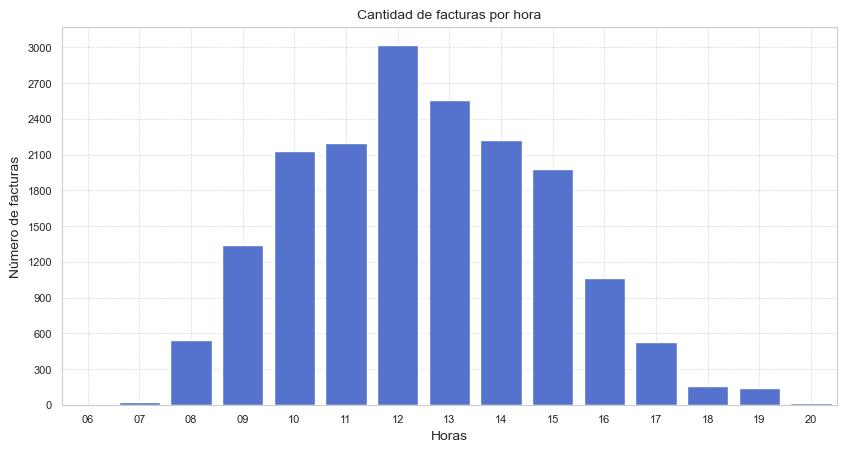

In [254]:
# Horario
grouped = pd.DataFrame(df_processed.groupby('Hour')['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad'})

barplot_topN(grouped, dx='Hour', dy=None, title='Cantidad de facturas por hora', grouped=True, df_grouped= grouped, top_n=None,
            horizontal=False, yticks=range(0,3001,300), xlabel='Horas', ylabel='Número de facturas', size=(10,5))

In [255]:
df_processed['Hour'].value_counts()

12    69685
13    62003
14    52373
11    47408
15    43921
10    36592
16    23283
09    21270
17    12713
08     8404
19     3162
18     2789
20      760
07      347
06        1
Name: Hour, dtype: int64

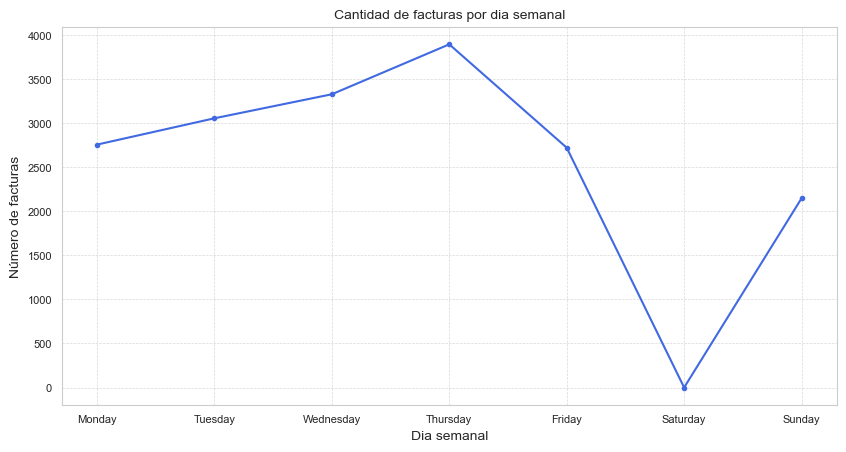

In [256]:
# Dia semanal
grouped = pd.DataFrame(df_processed.groupby(['WeekDay_Desc','WeekDay'])['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad'}).sort_values(by='WeekDay')
grouped.loc[len(grouped)] = ['Saturday', 5, 0]
grouped['WeekDay'] = grouped['WeekDay'].astype(int)
grouped = grouped.sort_values(by='WeekDay')

lineplot_timeline(df=grouped,dx='WeekDay_Desc',dy='Cantidad', pal='Blues', color='royalblue', size=(10, 5), title='Cantidad de facturas por dia semanal'
                  , xlabel='Dia semanal', ylabel='Número de facturas', rot=0, yticks=range(0,4001,500)) # , yticks=range(0,4001,400)

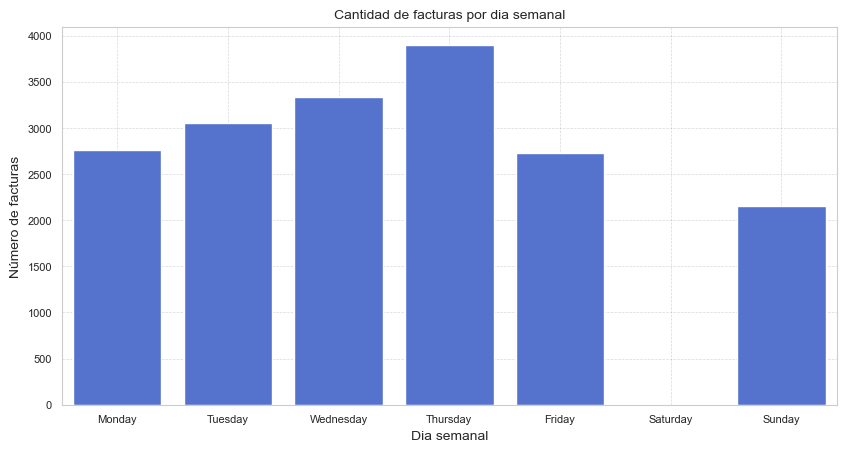

In [257]:
# Dia semanal
barplot_topN(grouped, dx='WeekDay_Desc', dy=None, title='Cantidad de facturas por dia semanal', grouped=True, df_grouped= grouped, top_n=None,
            horizontal=False, xlabel='Dia semanal', ylabel='Número de facturas', size=(10,5))

De acuerdo al historial de compras, observamos que el horario de compra regular es de 07:00 a 20:00 hrs, todos los días de la semana a excepción de los sábados.

### 5.3. ¿En qué horario sugeriría refuerzo en los servidores de la tienda para evitar un colapso?

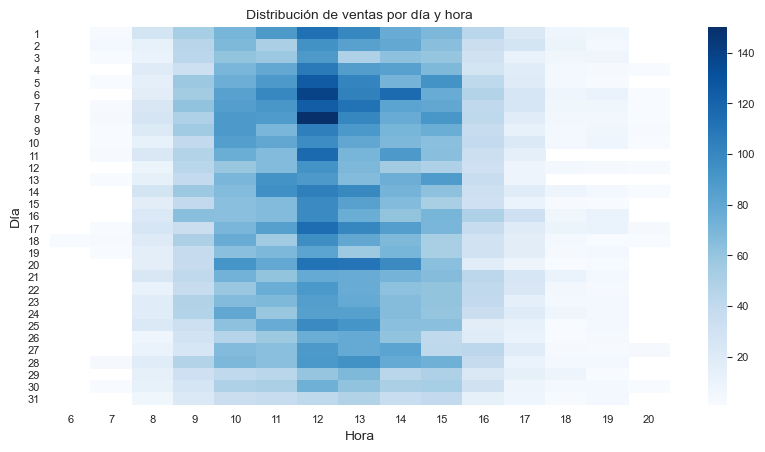

In [258]:
# Distribución de ventas por dia y hora
grouped = pd.DataFrame(df_processed.groupby(['Day','Hour'])['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad'})
grouped = grouped.astype(int)
grouped = grouped.pivot('Day', 'Hour', 'Cantidad')

plt.figure(figsize=(10,5))
heatmap = sns.heatmap(grouped, cmap='Blues')
plt.title("Distribución de ventas por día y hora", fontsize=10)
plt.xlabel("Hora")
plt.ylabel("Día");

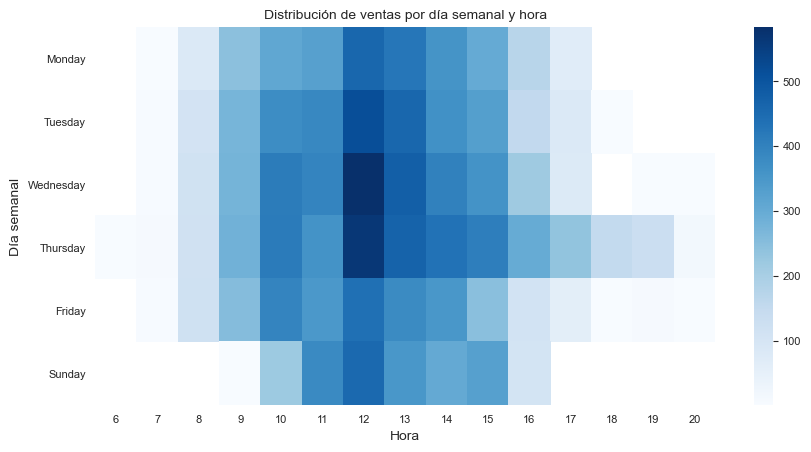

In [259]:
# Distribución de ventas por dia semanal y hora
grouped = pd.DataFrame(df_processed.groupby(['WeekDay','Hour'])['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad'}).sort_values(by='WeekDay')
grouped['WeekDay'] = grouped['WeekDay'].astype(int)
grouped['Hour'] = grouped['Hour'].astype(int)
grouped = grouped.pivot('WeekDay', 'Hour', 'Cantidad')
d = {0:'Monday',
     1:'Tuesday',
     2:'Wednesday',
     3:'Thursday',
     4:'Friday',
     5:'Saturday',
     6:'Sunday'
    }
grouped = grouped.rename(index=d)

plt.figure(figsize=(10,5))
heatmap = sns.heatmap(grouped, cmap='Blues')
plt.title("Distribución de ventas por día semanal y hora",fontsize=10)
plt.yticks(rotation=0)
plt.xlabel("Hora")
plt.ylabel("Día semanal");

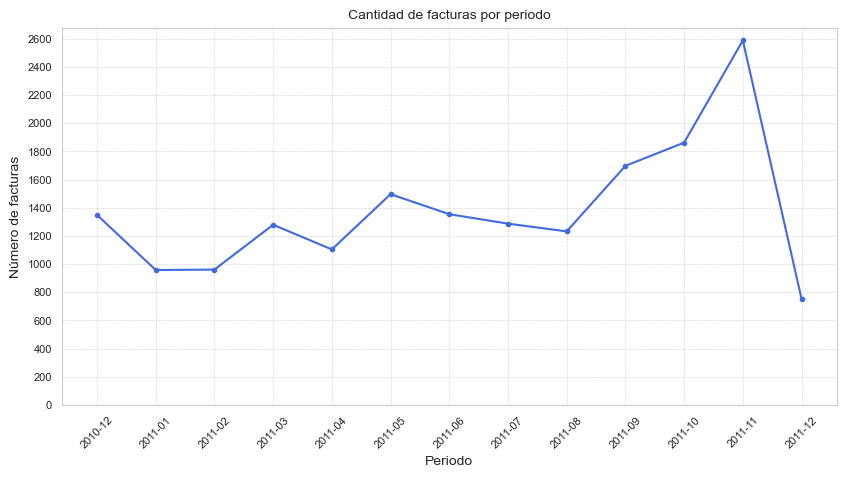

In [260]:
# Periodo | Cantidad facturas
grouped = pd.DataFrame(df_processed.groupby('Period')['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo':'Cantidad Facturas'})

lineplot_timeline(df=grouped,dx='Period',dy='Cantidad Facturas', pal='Blues', color='royalblue', title='Cantidad de facturas por periodo'
                  , xlabel='Periodo', ylabel='Número de facturas', yticks=range(0,2601,200),size=(10,5))

In [261]:
df_processed['Month'].value_counts()

11    62097
10    47785
12    41893
09    38903
05    27453
06    26301
03    26265
08    26156
07    25999
04    21999
01    20558
02    19302
Name: Month, dtype: int64

Se sugeriría aplicar refuerzo en el horario de 12:00 hrs a 14:00 hrs, expecialmente los días miércoles y jueves, y en los primeros 10 días de cada mes.

Por otro lado al mirar el comportamiento anual histórico, vemos que se necesita mayor capacidad los meses de octubre, noviembre y diciembre (cuarto trimestre)

### 5.4. ¿Qué frecuencia de compra tiene un cliente de alta frecuencia?

In [262]:
# Frecuencia de compra total
df1 = pd.DataFrame(df_master['Frequency'].describe())
df1.rename(columns={'Frequency': 'frecuencia_general'}, inplace=True)

# Frecuencia de compra de un cliente de alta frecuencia ( > quantile 75)
df2 = pd.DataFrame(df_master[df_master['F_Quantile']==1]['Frequency'].describe())
df2.rename(columns={'Frequency': 'frecuencia_alta'}, inplace=True)

# Merge
df1.merge(df2, left_index=True, right_index=True)

frecuencia_general  frecuencia_alta
count         4287.000000       852.000000
mean             4.179846        12.416667
std              7.436154        13.681327
min              1.000000         6.000000
25%              1.000000         7.000000
50%              2.000000         9.000000
75%              5.000000        13.000000
max            205.000000       205.000000

In [263]:
# Frecuencias de visitas
import plotly.figure_factory as ff
import numpy as np
colors = ['rgb(65,105,225)', 'rgb(135, 206, 250)']


x1 = df_master['Frequency']
x2 = df_master[df_master['F_Quantile']==1]['Frequency']
hist_data = [x1,x2]
group_labels = ['Frecuencia general', 'Frecuencia alta'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, colors=colors)

fig.update_layout(
    title="<b>Distribución de la frecuencia de compras por cliente</b>",
    xaxis_title="Compras",
    yaxis_title="Densidad",
    legend_title="Frecuencia",
    font=dict(
        #family="Courier New, monospace",
        size=10
        #color="RebeccaPurple"
    )
)

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 5
    )
)


fig.show()

Si definimos a un cliente de alta frecuencia como aquel que supera el percentil 75 de todas las frecuencias de clientes, vemos que este tiene una frecuencia promedio anual de 13 compras, donde el rango de frecuencia oscila entre un minimo de 6 y un máximo es de 205.

### 5.5. ¿Cuánto debería gastar un cliente para considerarlo sobre la media?

In [264]:
# Gasto de cliente general
df1 = pd.DataFrame(df_master['Monetary'].describe())
df1.rename(columns={'Monetary': 'gasto_general'}, inplace=True)

# Gasto de cliente con alto gasto
df2 = pd.DataFrame(df_master[df_master['M_Quantile']==1]['Monetary'].describe())
df2.rename(columns={'Monetary': 'gasto_alto'}, inplace=True)

# Merge
df1.merge(df2, left_index=True, right_index=True)

gasto_general     gasto_alto
count    4287.000000    1072.000000
mean     1565.202686    4678.905449
std      4526.029372    8282.614221
min         2.900000    1535.770000
25%       286.890000    2000.565000
50%       627.150000    2769.280000
75%      1535.015000    4443.900000
max    153714.680000  153714.680000

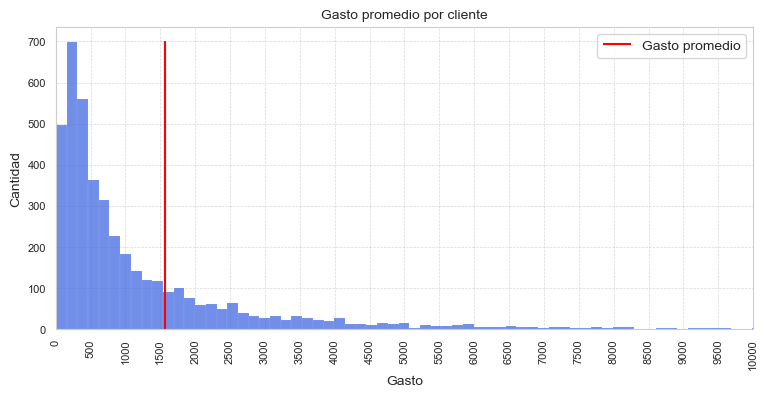

In [265]:
# Plot gasto promedio
plt.figure(figsize = (9,4))
sns.histplot(data=df_master, x="Monetary", color='royalblue')
plt.xticks(range(0,10001,500), rotation = 90)
plt.xlim(0,10000)
plt.vlines(x = df_master['Monetary'].mean(), ymin = 0, ymax=700,
           colors = 'red',
           label = 'Gasto promedio')

plt.title('Gasto promedio por cliente', fontsize=10)
plt.xlabel('Gasto')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='both', alpha=0.3)
sns.set_style("whitegrid")
plt.show()

Para considerar a un cliente sobre la media, este tendría que gastar una suma igual o mayor a 4.678 euros de forma anual.

### 5.6. ¿Cómo se distribuyen las antigüedades de los clientes?

In [266]:
df_master['Antiquity'].describe()

count    4287.000000
mean      222.318638
std       117.651253
min         0.000000
25%       112.000000
50%       248.000000
75%       326.000000
max       373.000000
Name: Antiquity, dtype: float64

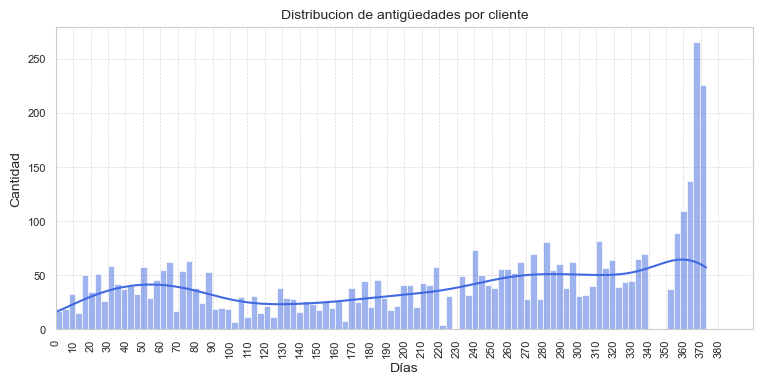

In [267]:
# Plot antiguedades por cliente (desde primera compra) - Dias
plt.figure(figsize = (9,4))
sns.histplot(data=df_master, x="Antiquity", color='royalblue', kde=True, bins=100, discrete=False)
plt.xticks(range(0,381,10), rotation = 90)
plt.xlim(0,400)
# plt.vlines(x = df_master['Monetary'].mean(), ymin = 0, ymax=700,
#            colors = 'red',
#            label = 'Gasto promedio')

plt.title('Distribucion de antigüedades por cliente', fontsize=10)
plt.xlabel('Días')
plt.ylabel('Cantidad')
#plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='both', alpha=0.3)
sns.set_style("whitegrid")
plt.show()

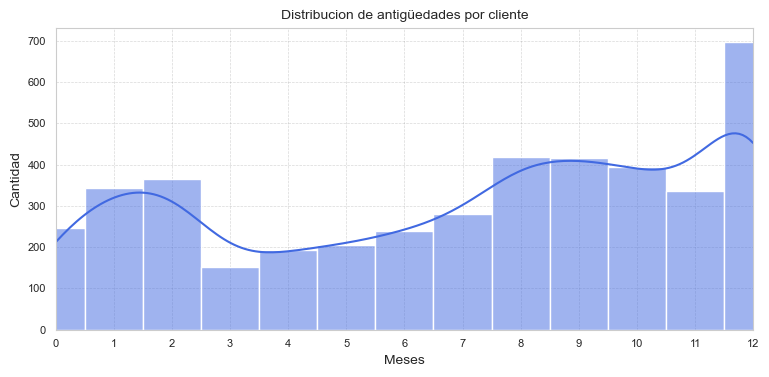

In [268]:
# Plot antiguedades por cliente (desde primera compra) - Meses
df1 = df_master.copy()
df1['Antiquity_Month'] = (df1['Antiquity']/30).astype(int)

plt.figure(figsize = (9,4))
sns.histplot(data=df1, x="Antiquity_Month", color='royalblue', kde=True, bins=12, discrete=True)  #, stat='count'
plt.xticks(range(0,13,1), rotation = 0)
plt.xlim(0,12)
# plt.vlines(x = df_master['Monetary'].mean(), ymin = 0, ymax=700,
#            colors = 'red',
#            label = 'Gasto promedio')

plt.title('Distribucion de antigüedades por cliente', fontsize=10)
plt.xlabel('Meses')
plt.ylabel('Cantidad')
#plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='both', alpha=0.3)
sns.set_style("whitegrid")
plt.show()

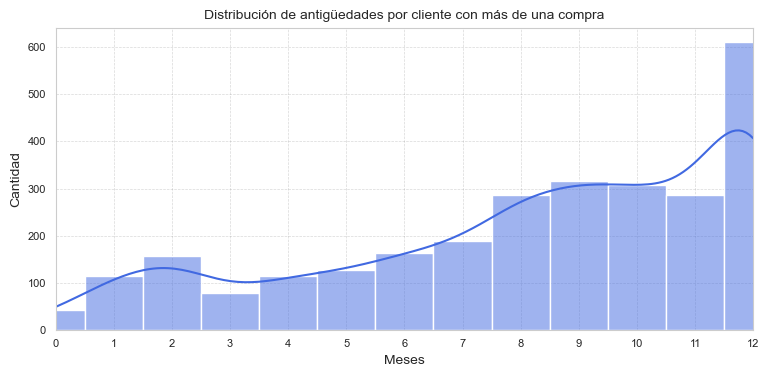

In [269]:
# Plot antiguedades por cliente (desde primera compra) - Meses - Sin considerar clientes con Frequency=1
df1 = df_master.copy()
df1['Antiquity_Month'] = (df1['Antiquity']/30).astype(int)
df1 = df1[df1['Frequency']>1]

plt.figure(figsize = (9,4))
sns.histplot(data=df1, x="Antiquity_Month", color='royalblue', kde=True, bins=12, discrete=True)  #, stat='probability'
plt.xticks(range(0,13,1), rotation = 0)
plt.xlim(0,12)
# plt.vlines(x = df_master['Monetary'].mean(), ymin = 0, ymax=700,
#            colors = 'red',
#            label = 'Gasto promedio')

plt.title('Distribución de antigüedades por cliente con más de una compra', fontsize=10)
plt.xlabel('Meses')
plt.ylabel('Cantidad')
#plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='both', alpha=0.3)
sns.set_style("whitegrid")
plt.show()

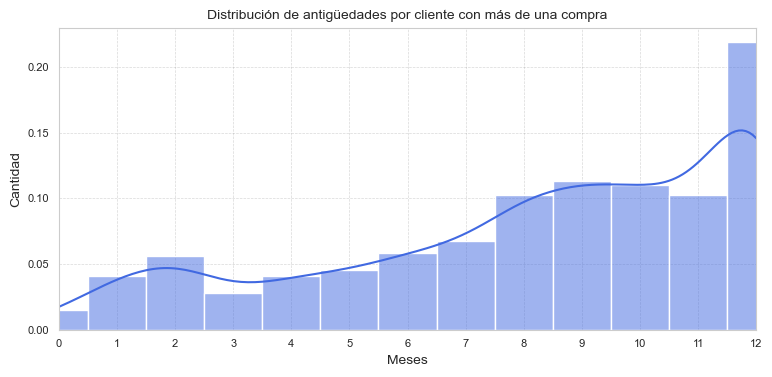

In [270]:
# Plot antiguedades por cliente (desde primera compra) - Meses - Sin considerar clientes con Frequency=1
df1 = df_master.copy()
df1['Antiquity_Month'] = (df1['Antiquity']/30).astype(int)
df1 = df1[df1['Frequency']>1]

plt.figure(figsize = (9,4))
sns.histplot(data=df1, x="Antiquity_Month", color='royalblue', kde=True, bins=12, discrete=True, stat='density')  #, stat='probability'
plt.xticks(range(0,13,1), rotation = 0)
plt.xlim(0,12)
# plt.vlines(x = df_master['Monetary'].mean(), ymin = 0, ymax=700,
#            colors = 'red',
#            label = 'Gasto promedio')

plt.title('Distribución de antigüedades por cliente con más de una compra', fontsize=10)
plt.xlabel('Meses')
plt.ylabel('Cantidad')
#plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='both', alpha=0.3)
sns.set_style("whitegrid")
plt.show()

In [271]:
df1['Antiquity'].describe()

count    2790.000000
mean      257.827240
std       102.645737
min         9.000000
25%       191.000000
50%       282.000000
75%       358.000000
max       373.000000
Name: Antiquity, dtype: float64

Si definimos la antiguedad como la diferencia entre su primera compra y la fecha de análisis (para estos efectos la fecha máxima de la base de datos que es: 2011-12-09), podemos apreciar que la información se concentra en los 12 meses (o >350 dias), donde se infiere que muchos de estos clientes solo han hecho una compra y no han vuelto. 

Sin embargo, si quitamos a los clientes que solo han hecho una compra, tenemos que la concentración de antiguedad sigue siendo de 12 meses, donde lo sigue de cerca los meses 11, 10 y 9.

### 5.7. Si se clasifican en 3 grupos a los clientes, en base a su frecuencia de compra ¿Qué diferencias existen entre cada clúster?

In [272]:
# Scatter plot using Plotly agrupando clusters por frecuencia

fig = go.Figure()
DF = df_master.copy()

for C in list(np.sort(DF.cluster_frecuencia.unique())):
    
    fig.add_trace(go.Scatter3d( x = DF[DF.cluster_frecuencia == C]['Recency'],
                                y = DF[DF.cluster_frecuencia == C]['Frequency'],
                                z = DF[DF.cluster_frecuencia == C]['Monetary'],
                                mode = 'markers', 
                                name = 'Cluster ' + str(C),
                                marker=dict(size=5,
                                   color=DF[DF.cluster_frecuencia == C]['color_cluster_f'].unique()[0])  # Cluster creado con K-Means en base a frecuencia
                            )
    )


fig.update_layout(width = 700, height = 700, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Recencia (días)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frecuencia (compras)', titlefont_color = 'black'),
                                zaxis=dict(title = 'Gasto (euros)', titlefont_color = 'black')))


fig.update_layout(
    title={
        'text': "<b>Segmentación de clientes</b>",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        
    font = dict(
        size=10
    )
    )

fig.update_layout(showlegend=True)

# fig.update_traces(hoverinfo="none", hovertemplate=None)

fig.update_layout(
    autosize=True,
    width=700,
    height=700)

En base al gráfico anterior, podemos definir los 3 clusters de la siguiente forma:

* Cluster 0: Baja frecuencia (3 compras), bajo gasto (965 euros) y una alta recencia (98 días) - (mayoría de los clientes)
* Cluster 1: Alta frecuencia (126 compras), alto gasto (46.254 euros), baja recencia (1 día) - (minoría de los clientes pero los que más aportan valor)
* Cluster 2: Frecuencia media (18 compras), gasto medio (8.175 euros), recencia meda (15 días) - (porcentaje bajo que también aporta valor, en menor escala que el cluster 1)

In [273]:
df_master.groupby('cluster_frecuencia', as_index=False)[['Recency','Frequency','Monetary']].mean()

cluster_frecuencia    Recency   Frequency      Monetary
0                   0  98.375095    2.848248    964.818819
1                   1   1.142857  126.571429  46253.937143
2                   2  15.565495   18.319489   8175.112141

In [274]:
df_master.groupby('cluster_frecuencia', as_index=False)[['Recency','Frequency','Monetary']].count()

cluster_frecuencia  Recency  Frequency  Monetary
0                   0     3967       3967      3967
1                   1        7          7         7
2                   2      313        313       313

## 6. Conclusiones

En el presente documento se realizó un estudio de las ventas de una compañia de retail en el transcurso de 1 año. 

Como primera tarea, se levantó un análisis exploratorio investigando la naturaleza de sus variables, las cuales se clasificaban en numéricas, categóricas, y de tipo fecha. A partir de este primer adentramiento, se logró identificar patrones preliminares de agrupación, y formas en las que se podría limpiar las fuentes de información. 

Luego, y en base a lo anterior, se lleva a cabo un pre-procesamiento de la data, donde se realizan tareas de limpieza y transformación, tales como eliminar duplicados, nulos, outliers, y a su vez creando nuevos features a partir de la información inicial. 

Una vez con la data limpia y ordenada, se procedió a realizar análsis univariados y bivariados de la información, rescatando información asertiva de las carácteristicas de las ventas, tales como las distribuciones de cantidad y precio por producto, correlaciones entre los dias y horas en las ventas, y los top 10 de productos más vendidos. 

Finalmente se realizó una segmentación en base a la recencia, frecuencia y gasto (RFM) por cliente, donde a partir de esta frecuencia obtenida se aplicó una clusterización identificando 3 categorías de clientes: 

* Clientes tipo 0: Baja frecuencia (3 compras), bajo gasto (965 euros) y una alta recencia (98 días) - (mayoría de los clientes)
* Clientes tipo 1: Alta frecuencia (126 compras), alto gasto (46.254 euros), baja recencia (1 día) - (minoría de los clientes pero los que más aportan valor)
* Clientes tipo 2: Frecuencia media (18 compras), gasto medio (8.175 euros), recencia meda (15 días) - (porcentaje bajo que también aporta valor, en menor escala que el cluster 1)